<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import log_loss
import panel as pn
from scipy.stats import norm

import pandas as pd
pn.extension('plotly')
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider
import ipywidgets as widgets
from ipywidgets import interactive
from plotly import graph_objs as go
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


## 1.1 Conjuntos de datos: Pruebas saber 11 2019-1, 2019-2 y clasificación panteles 2018-1 y 2018-2 

Los periodos 2019-1 y 2019-2 se los resultados de las pruebas saber 11 se tomaron en cuenta dado que es el último año donde las pruebas se presentaban normalmente. Por otra parte, los periodos 2018-1 y 2018-2 de la clasificación de los colegios se tomaron con un año de rezago para que la predicción sea lo más acertada posible, pues estos conjuntos de datos contemplan variables que permiten clasificar los colegios y podrían tener alguna relación con el desempeño del estudiante en las pruebas saber 11.

### 1.1.1 Base pruebas saber 11 2019-1 - Estructura de la base 

In [2]:
#saber 11 2019-1
saber11_201901 = pd.read_csv('Saber11/SB11_20191.txt', error_bad_lines=False, sep = "¬", encoding='utf8' )
saber11_201901.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,F,07/12/2000,20191,SB11201910008548,ESTUDIANTE,COLOMBIA,No,NaN,...,54,39,A1,235,29,58.199483,3.0,3.0,PUBLICAR,NO
1,CC,COLOMBIA,F,23/03/1998,20191,SB11201910004475,ESTUDIANTE,COLOMBIA,No,NaN,...,35,10,A-,217,21,51.018527,2.0,3.0,PUBLICAR,NO
2,TI,COLOMBIA,M,22/03/2001,20191,SB11201910011427,ESTUDIANTE,COLOMBIA,No,NaN,...,49,32,A1,246,34,50.855657,2.0,3.0,PUBLICAR,NO
3,CC,COLOMBIA,M,16/06/1994,20191,SB11201910041975,ESTUDIANTE,COLOMBIA,No,NaN,...,64,55,A2,255,38,52.688203,3.0,3.0,PUBLICAR,NO
4,CC,COLOMBIA,F,21/09/2000,20191,SB11201910014490,ESTUDIANTE,COLOMBIA,No,NaN,...,71,64,B1,280,48,73.930829,4.0,4.0,PUBLICAR,NO


#### 1.1.1.1 Dimensiones de la base

In [3]:
#dimensiones 
print("Filas y columnas pruebas saber 11 2019-1", saber11_201901.shape)

Filas y columnas pruebas saber 11 2019-1 (21083, 82)


#### 1.1.1.2 Tipos de datos de la base

In [4]:
#Tipos de datos saber 11 2019-1
print(saber11_201901.dtypes)

ESTU_TIPODOCUMENTO           object
ESTU_NACIONALIDAD            object
ESTU_GENERO                  object
ESTU_FECHANACIMIENTO         object
PERIODO                       int64
                             ...   
ESTU_INSE_INDIVIDUAL        float64
ESTU_NSE_INDIVIDUAL         float64
ESTU_NSE_ESTABLECIMIENTO    float64
ESTU_ESTADOINVESTIGACION     object
ESTU_GENERACION-E            object
Length: 82, dtype: object


### 1.1.2 Base pruebas saber 11 2019-2 - Estructura de la base 

In [5]:
#saber 11 2019-2
saber11_201902 = pd.read_csv('Saber11/SB11_20192.txt', error_bad_lines=False, sep = "¬", encoding='utf8' )
saber11_201902.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,18/02/2002,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,NaN,...,54.0,67,A1,208,25.0,50.942156,2.0,2.0,PUBLICAR,NO
1,TI,COLOMBIA,F,24/01/2003,20194,SB11201940469859,ESTUDIANTE,No,COLOMBIA,NaN,...,64.0,89,A2,280,74.0,61.920976,3.0,3.0,PUBLICAR,NO
2,TI,COLOMBIA,M,28/06/2003,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,NaN,...,63.0,88,A2,299,83.0,59.767864,3.0,4.0,PUBLICAR,NO
3,TI,COLOMBIA,M,02/06/2001,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,NaN,...,64.0,89,A2,299,84.0,50.764238,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,26/04/2002,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,53.0,67,A1,309,88.0,45.779135,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD


#### 1.1.2.1 Dimensiones de la base

In [6]:
#Dimesiones 
print("Filas y columnas pruebas saber 11 2019-2",saber11_201902.shape)

Filas y columnas pruebas saber 11 2019-2 (546212, 82)


#### 1.1.2.2 Tipos de datos de la base

In [7]:
#tipos de datos saber 11 2019-2
print(saber11_201902.dtypes)

ESTU_TIPODOCUMENTO           object
ESTU_NACIONALIDAD            object
ESTU_GENERO                  object
ESTU_FECHANACIMIENTO         object
PERIODO                       int64
                             ...   
ESTU_INSE_INDIVIDUAL        float64
ESTU_NSE_INDIVIDUAL         float64
ESTU_NSE_ESTABLECIMIENTO    float64
ESTU_ESTADOINVESTIGACION     object
ESTU_GENERACION-E            object
Length: 82, dtype: object


### 1.1.3 Base clasificación plantesles  2018-1 - Estructura de la base 

In [8]:
#Clasificacion planteles 2018 
clasif_planteles_20181 = pd.read_csv('Saber11/SB11-CLASIFI-PLANTELES-20181.txt', sep="[\t|]", engine='python')
for i in clasif_planteles_20181:
    if i[:3] == 'Unn':
        clasif_planteles_20181.drop(i, axis=1, inplace= True)
clasif_planteles_20181 .head()

,PERIODO,COLE_COD_DANE,COLE_INST_NOMBRE,COLE_CODMPIO_COLEGIO,COLE_MPIO_MUNICIPIO,COLE_COD_DEPTO,COLE_DEPTO_COLEGIO,COLE_NATURALEZA,COLE_GRADO,COLE_CALENDARIO_COLEGIO,COLE_GENEROPOBLACION,MATRICULADOS_ULTIMOS_3,EVALUADOS_ULTIMOS_3,INDICE_MATEMATICAS,INDICE_C_NATURALES,INDICE_SOCIALES_CIUDADANAS,INDICE_LECTURA_CRITICA,INDICE_INGLES,INDICE_TOTAL,COLE_CATEGORIA
0,20181,308001074789,AMERICAN SCHOOL,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,MI,77,76,0.8184,0.8297,0.8215,0.8145,0.9203,0.8287,A+
1,20181,308573000450,INSTITUCION EDUCATIVA ASPAEN GIMNASIO ALTAMAR ...,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,M,34,34,0.8173,0.8321,0.8212,0.8125,0.9068,0.8274,A+
2,20181,308001073952,COLEGIO ALTAMIRA,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,MI,127,120,0.8870,0.8848,0.8731,0.8633,0.9562,0.8832,A+
3,20181,308001101153,COLEGIO BRITANICO INTERNACIONAL,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,MI,164,159,0.8626,0.8581,0.8374,0.8402,0.9496,0.8573,A+
4,20181,308573074909,COLEGIO SAN JOSÉ,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,MI,248,238,0.8541,0.8493,0.8423,0.8378,0.9217,0.8517,A+


#### 1.1.3.1 Dimensiones de la base

In [9]:
#Dimesiones clasificación planteles 2018-1
print("Filas y clasificación planteles 2018-1",clasif_planteles_20181.shape)

Filas y clasificación planteles 2018-1 (281, 20)


#### 1.1.3.2 Tipos de datos de la base

In [10]:
#tipos de datos clasificación planteles 2018-1
print(clasif_planteles_20181.dtypes)

PERIODO                         int64
COLE_COD_DANE                   int64
COLE_INST_NOMBRE               object
COLE_CODMPIO_COLEGIO            int64
COLE_MPIO_MUNICIPIO            object
COLE_COD_DEPTO                  int64
COLE_DEPTO_COLEGIO             object
COLE_NATURALEZA                object
COLE_GRADO                      int64
COLE_CALENDARIO_COLEGIO        object
COLE_GENEROPOBLACION           object
MATRICULADOS_ULTIMOS_3          int64
EVALUADOS_ULTIMOS_3             int64
INDICE_MATEMATICAS            float64
INDICE_C_NATURALES            float64
INDICE_SOCIALES_CIUDADANAS    float64
INDICE_LECTURA_CRITICA        float64
INDICE_INGLES                 float64
INDICE_TOTAL                  float64
COLE_CATEGORIA                 object
dtype: object


### 1.1.4 Base clasificación plantesles  2018-2 - Estructura de la base 

In [11]:
#Clasificacion planteles 2018-2
clasif_planteles_20182 = pd.read_csv('Saber11/SB11-CLASIFI-PLANTELES-20182.txt', sep = "¬", encoding = "utf8")
clasif_planteles_20182.head()

,PERIODO,COLE_COD_DANE,COLE_INST_NOMBRE,COLE_CODMPIO_COLEGIO,COLE_MPIO_MUNICIPIO,COLE_COD_DEPTO,COLE_DEPTO_COLEGIO,COLE_NATURALEZA,COLE_GRADO,COLE_CALENDARIO_COLEGIO,COLE_GENEROPOBLACION,MATRICULADOS_ULTIMOS_3,EVALUADOS_ULTIMOS_3,INDICE_MATEMATICAS,INDICE_C_NATURALES,INDICE_SOCIALES_CIUDADANAS,INDICE_LECTURA_CRITICA,INDICE_INGLES,INDICE_TOTAL,COLE_CATEGORIA
0,20182,205790000235,I. E. LA INMACULADA,5790,TARAZÁ,5,ANTIOQUIA,OFICIAL,11,A,MI,72,61,"0,54","0,5809","0,5543","0,615","0,5495","0,5708",D
1,20182,154128000019,INST EDUCATIVA COL NUESTRA SEÑORA DEL ROSARIO,54128,CÁCHIRA,54,NORTE SANTANDER,OFICIAL,11,A,MI,85,85,"0,7415","0,7333","0,6653","0,7254","0,6765","0,7133",B
2,20182,108433000051,INSTITUCION EDUCATIVA SIMON BOLIVAR,8433,MALAMBO,8,ATLANTICO,OFICIAL,11,A,MI,198,194,"0,6055","0,6358","0,609","0,666","0,6434","0,6302",C
3,20182,105147000568,I. E. JOSE MARIA MUÑOZ FLOREZ,5147,CAREPA,5,ANTIOQUIA,OFICIAL,11,A,MI,266,262,"0,6977","0,665","0,6726","0,7084","0,6564","0,6836",B
4,20182,105147000401,I. E. COLOMBIA,5147,CAREPA,5,ANTIOQUIA,OFICIAL,11,A,MI,276,238,"0,6607","0,6462","0,6305","0,6924","0,6099","0,6538",C


#### 1.1.4.1 Dimensiones de la base

In [12]:
#dimensiones 
print("Filas y clasificación planteles 2018-2",clasif_planteles_20182.shape)

Filas y clasificación planteles 2018-2 (9150, 20)


#### 1.1.4.2 Tipos de datos de la base

In [13]:
#tipo de datos Filas y clasificación planteles 2018-12
print(clasif_planteles_20182.dtypes)

PERIODO                        int64
COLE_COD_DANE                  int64
COLE_INST_NOMBRE              object
COLE_CODMPIO_COLEGIO           int64
COLE_MPIO_MUNICIPIO           object
COLE_COD_DEPTO                 int64
COLE_DEPTO_COLEGIO            object
COLE_NATURALEZA               object
COLE_GRADO                     int64
COLE_CALENDARIO_COLEGIO       object
COLE_GENEROPOBLACION          object
MATRICULADOS_ULTIMOS_3         int64
EVALUADOS_ULTIMOS_3            int64
INDICE_MATEMATICAS            object
INDICE_C_NATURALES            object
INDICE_SOCIALES_CIUDADANAS    object
INDICE_LECTURA_CRITICA        object
INDICE_INGLES                 object
INDICE_TOTAL                  object
COLE_CATEGORIA                object
dtype: object


## 1.2 selección de variables de los conjunto de datos que pueden explicar el desempeño de ls estudiantes en la prueba y unión de las bases

In [14]:
#selección de variables de os conjunto de datos que se presume que pueden explicar los resultados de las pruebas
df_201901=saber11_201901[["ESTU_GENERO", "ESTU_CONSECUTIVO",  "ESTU_TIENEETNIA", "ESTU_ETNIA", "ESTU_DEPTO_RESIDE", 
"ESTU_MCPIO_RESIDE", "FAMI_ESTRATOVIVIENDA",  "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE" ,
"FAMI_TRABAJOLABORPADRE","FAMI_TRABAJOLABORMADRE", "FAMI_TIENEINTERNET",  
"FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO" ,
"FAMI_SITUACIONECONOMICA", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET" , "COLE_NATURALEZA",
"COLE_BILINGUE", "COLE_CARACTER","COLE_COD_DANE_ESTABLECIMIENTO", "COLE_NOMBRE_ESTABLECIMIENTO", "COLE_JORNADA",
"PUNT_GLOBAL","PERCENTIL_GLOBAL", "ESTU_INSE_INDIVIDUAL"]]

df_201902=saber11_201902[["ESTU_GENERO", "ESTU_CONSECUTIVO",  "ESTU_TIENEETNIA", "ESTU_ETNIA", "ESTU_DEPTO_RESIDE", 
"ESTU_MCPIO_RESIDE", "FAMI_ESTRATOVIVIENDA",  "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE" ,
"FAMI_TRABAJOLABORPADRE","FAMI_TRABAJOLABORMADRE", "FAMI_TIENEINTERNET", 
 "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO",
"FAMI_SITUACIONECONOMICA", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET" , "COLE_NATURALEZA",
"COLE_BILINGUE", "COLE_CARACTER","COLE_COD_DANE_ESTABLECIMIENTO", "COLE_NOMBRE_ESTABLECIMIENTO", "COLE_JORNADA", 
"PUNT_GLOBAL","PERCENTIL_GLOBAL", "ESTU_INSE_INDIVIDUAL"]]

#seleccion de variables de la clasificación de los palentes 
panteles_20181 = clasif_planteles_20181[["INDICE_TOTAL", "COLE_COD_DANE", "COLE_CATEGORIA"]]
panteles_20182 = clasif_planteles_20182[["INDICE_TOTAL", "COLE_COD_DANE", "COLE_CATEGORIA"]]

### 1.2.1 unión de los conjuntos de datos de las pruebas saber 11 2019-1 y 2019-2, así como la unión de los conjuntos de datos correspondientes a la clasificación de los planteles de 2018-1 y 2018-2

In [15]:
#union de los conjuntos de datos 
df_resultados_2019 = df_201901.append(df_201902)
df_colegios_2018 = panteles_20181.append(panteles_20182)
df_resultados_2019["COLE_COD_DANE"] = df_resultados_2019["COLE_COD_DANE_ESTABLECIMIENTO"] 


#### 1.2.1.1 dimenciones de la union de los conjuntos de datos correspondientes a las pruebas saber de 2019 

In [16]:
#dimenciones union pruebas saber 2019 
print("filas y columnas Prubas saber 11 2019-1 y 2019-2",  df_resultados_2019.shape)

filas y columnas Prubas saber 11 2019-1 y 2019-2 (567295, 28)


#### 1.2.1.2 dimenciones de la union de los conjuntos de datos correspondientes a la clasificación de los colegios de 2018

In [17]:
#dimensiones colegios 
print("filas y columnas colegios 2018", df_colegios_2018.shape)

filas y columnas colegios 2018 (9431, 3)


##### 1.2.1.2.1 Verificar duplicados del conjunto de datos correspondientes a la clasificación de los colegios de 2018

In [18]:
#verificar dupicados en los colegios
len(df_colegios_2018["COLE_COD_DANE"].unique()) 
df_colegios_2018[df_colegios_2018.COLE_COD_DANE.duplicated()].COLE_COD_DANE.iloc[:]

9       205138000142
14      205858000093
30      105467000019
33      117050000316
45      125873000209
            ...     
8870    241791000332
8879    144430000031
8936    247288001168
9035    311001800081
9122    217001001557
Name: COLE_COD_DANE, Length: 450, dtype: int64

El conjunto de datos presenta duplicados, por lo cual es necesario un proceso de agrupación, dado que varios colegios, estuvieron presentes en ambos periodos en las pruebas (1 y 2). Para agrupas, se usa el promedio en el caso de las variables de interés numéricas y el máximo en el caso de las variables de interés categóricas.

##### 1.2.1.2.2 transfomar tipo de datos y agrupar para eliminar datos duplicados. 

En la observación de los archivos de los conjuntos de datos correspondientes a este inciso, se presentó que la base correspondiente al periodo 2018-2, presenta comas en los valores numéricos mientras que en la base correspondiente al periodo de 2018-1, presenta puntos. Por lo cual se hizo transformación en los datos.

In [19]:
#transfomar tipo de datos y agrupar para eliminar datos duplicados 
def cambiar_comas (x, var1):
    if type(x[var1]) == str:
        x[var1]=x[var1].replace(",", ".")
    return x
df_colegios_2018 = df_colegios_2018.apply(lambda x: cambiar_comas(x, 'INDICE_TOTAL'), axis = 1)
df_colegios_2018["INDICE_TOTAL"] = pd.to_numeric(df_colegios_2018["INDICE_TOTAL"])

df_avg=df_colegios_2018[["COLE_COD_DANE", "INDICE_TOTAL"]].groupby(["COLE_COD_DANE"]).aggregate(["mean"])
dg_max=df_colegios_2018[["COLE_COD_DANE", "COLE_CATEGORIA"]].groupby(["COLE_COD_DANE"]).aggregate(["max"])

df_agg_colegios = pd.merge(df_avg,dg_max, left_index=True,right_index=True, how='inner')
df_agg_colegios.shape

(8981, 2)

### 1.2.2 Conjunto de datos resultante

In [20]:
#tabla final de los resultados 
resultatos_saber11_2019 = pd.merge(df_resultados_2019, df_agg_colegios,  on = "COLE_COD_DANE", how='left')
resultatos_saber11_2019["colegio_categoria"] =resultatos_saber11_2019.iloc[:,[-1]]
resultatos_saber11_2019["indice_total_colegio"] =resultatos_saber11_2019.iloc[:,[-3]]
resultatos_saber11_2019.drop(resultatos_saber11_2019.iloc[:,[-3]], axis=1, inplace= True)
resultatos_saber11_2019.drop(resultatos_saber11_2019.iloc[:,[-3]], axis=1, inplace= True)
resultatos_saber11_2019.index = resultatos_saber11_2019["ESTU_CONSECUTIVO"]
resultatos_saber11_2019.head()

,ESTU_GENERO,ESTU_CONSECUTIVO,ESTU_TIENEETNIA,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,...,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_JORNADA,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,COLE_COD_DANE,colegio_categoria,indice_total_colegio
ESTU_CONSECUTIVO,,,,,,,,,,,,,,,,,,,,,
SB11201910008548,F,SB11201910008548,No,NaN,VALLE,CALI,Estrato 4,Técnica o tecnológica incompleta,Secundaria (Bachillerato) completa,"Trabaja como profesional (por ejemplo médico, ...",...,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,NOCHE,235,29.0,58.199483,176001002555,D,0.61015
SB11201910004475,F,SB11201910004475,No,NaN,VALLE,CALI,Estrato 3,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,...,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,NOCHE,217,21.0,51.018527,176001002555,D,0.61015
SB11201910011427,M,SB11201910011427,No,NaN,VALLE,CALI,Estrato 2,Primaria incompleta,Educación profesional completa,Es dueño de un negocio pequeño (tiene pocos em...,...,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,NOCHE,246,34.0,50.855657,176001002555,D,0.61015
SB11201910041975,M,SB11201910041975,No,NaN,VALLE,CALI,Estrato 2,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...",...,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,NOCHE,255,38.0,52.688203,176001002555,D,0.61015
SB11201910014490,F,SB11201910014490,No,NaN,BOGOTA,BOGOTÁ D.C.,Estrato 6,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...",...,ACADÉMICO,311848001011,COL ANGLO COLOMBIANO ...,COMPLETA,280,48.0,73.930829,311848001011,A+,0.86790


#### 1.2.2.1 dimensiones

In [21]:
#dimensiones
print("filas y columnas resultados 2019", resultatos_saber11_2019.shape)

filas y columnas resultados 2019 (567295, 30)


#### 1.2.2.2 validación de datos unicos

In [22]:
#validación de datos unicos
len(resultatos_saber11_2019["ESTU_CONSECUTIVO"].unique()) 

567295

#### 1.2.2.3 Valores faltantes

In [23]:
#nulls
resultatos_saber11_2019.isnull().sum()

ESTU_GENERO                         106
ESTU_CONSECUTIVO                      0
ESTU_TIENEETNIA                     394
ESTU_ETNIA                       527063
ESTU_DEPTO_RESIDE                   394
ESTU_MCPIO_RESIDE                   394
FAMI_ESTRATOVIVIENDA              35928
FAMI_EDUCACIONPADRE               31872
FAMI_EDUCACIONMADRE               31694
FAMI_TRABAJOLABORPADRE            19192
FAMI_TRABAJOLABORMADRE            18354
FAMI_TIENEINTERNET                32346
FAMI_NUMLIBROS                    46414
FAMI_COMELECHEDERIVADOS           38231
FAMI_COMECARNEPESCADOHUEVO        33943
FAMI_SITUACIONECONOMICA           18758
ESTU_DEDICACIONLECTURADIARIA      33123
ESTU_DEDICACIONINTERNET           34330
COLE_NATURALEZA                       0
COLE_BILINGUE                     91546
COLE_CARACTER                     16399
COLE_COD_DANE_ESTABLECIMIENTO         0
COLE_NOMBRE_ESTABLECIMIENTO           0
COLE_JORNADA                          0
PUNT_GLOBAL                           0


#### 1.2.2.4 Exclusión de variables que no se tendrán en cuenta en el análisis ni en las estimaciones 

In [24]:
#eliminar variables con un gran volumen de valores null y no se usaran en el analisis, 
#como el id del estudiante o el id del colegio 
resultatos_saber11_2019_final = resultatos_saber11_2019.drop(['COLE_NOMBRE_ESTABLECIMIENTO','ESTU_CONSECUTIVO', 'ESTU_ETNIA', 'COLE_COD_DANE', 'COLE_COD_DANE_ESTABLECIMIENTO'], axis=1)
resultatos_saber11_2019_final.head()

,ESTU_GENERO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,...,ESTU_DEDICACIONINTERNET,COLE_NATURALEZA,COLE_BILINGUE,COLE_CARACTER,COLE_JORNADA,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,colegio_categoria,indice_total_colegio
ESTU_CONSECUTIVO,,,,,,,,,,,,,,,,,,,,,
SB11201910008548,F,No,VALLE,CALI,Estrato 4,Técnica o tecnológica incompleta,Secundaria (Bachillerato) completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,...,Entre 1 y 3 horas,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,235,29.0,58.199483,D,0.61015
SB11201910004475,F,No,VALLE,CALI,Estrato 3,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Si,...,Entre 1 y 3 horas,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,217,21.0,51.018527,D,0.61015
SB11201910011427,M,No,VALLE,CALI,Estrato 2,Primaria incompleta,Educación profesional completa,Es dueño de un negocio pequeño (tiene pocos em...,Tiene un trabajo de tipo auxiliar administrati...,Si,...,30 minutos o menos,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,246,34.0,50.855657,D,0.61015
SB11201910041975,M,No,VALLE,CALI,Estrato 2,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,...,Más de 3 horas,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,255,38.0,52.688203,D,0.61015
SB11201910014490,F,No,BOGOTA,BOGOTÁ D.C.,Estrato 6,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,...,Entre 1 y 3 horas,NO OFICIAL,S,ACADÉMICO,COMPLETA,280,48.0,73.930829,A+,0.86790


In [25]:
#tipo de variables de las variables seleccionadas 
print(resultatos_saber11_2019_final.dtypes, resultatos_saber11_2019_final.shape)

ESTU_GENERO                      object
ESTU_TIENEETNIA                  object
ESTU_DEPTO_RESIDE                object
ESTU_MCPIO_RESIDE                object
FAMI_ESTRATOVIVIENDA             object
FAMI_EDUCACIONPADRE              object
FAMI_EDUCACIONMADRE              object
FAMI_TRABAJOLABORPADRE           object
FAMI_TRABAJOLABORMADRE           object
FAMI_TIENEINTERNET               object
FAMI_NUMLIBROS                   object
FAMI_COMELECHEDERIVADOS          object
FAMI_COMECARNEPESCADOHUEVO       object
FAMI_SITUACIONECONOMICA          object
ESTU_DEDICACIONLECTURADIARIA     object
ESTU_DEDICACIONINTERNET          object
COLE_NATURALEZA                  object
COLE_BILINGUE                    object
COLE_CARACTER                    object
COLE_JORNADA                     object
PUNT_GLOBAL                       int64
PERCENTIL_GLOBAL                float64
ESTU_INSE_INDIVIDUAL            float64
colegio_categoria                object
indice_total_colegio            float64


####  1.2.2.5 Vista general del conjunto de datos

In [26]:
#Vista general del conjunto de datos
resultatos_saber11_2019_final.sample(5).T

ESTU_CONSECUTIVO,SB11201940539513,SB11201940575213,SB11201940508505,SB11201940196824,SB11201940392639
ESTU_GENERO,F,F,F,F,F
ESTU_TIENEETNIA,No,No,No,No,No
ESTU_DEPTO_RESIDE,PUTUMAYO,BOGOTÁ,BOGOTÁ,BOGOTÁ,BOGOTÁ
ESTU_MCPIO_RESIDE,VALLE DEL GUAMUEZ,BOGOTÁ D.C.,BOGOTÁ D.C.,BOGOTÁ D.C.,BOGOTÁ D.C.
FAMI_ESTRATOVIVIENDA,NaN,Estrato 2,NaN,Estrato 2,Estrato 3
FAMI_EDUCACIONPADRE,NaN,Primaria incompleta,NaN,Técnica o tecnológica completa,Secundaria (Bachillerato) completa
FAMI_EDUCACIONMADRE,NaN,Secundaria (Bachillerato) completa,NaN,Técnica o tecnológica completa,Secundaria (Bachillerato) incompleta
FAMI_TRABAJOLABORPADRE,NaN,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,NaN,Es vendedor o trabaja en atención al público
FAMI_TRABAJOLABORMADRE,NaN,"Trabaja como personal de limpieza, mantenimien...",NaN,NaN,Es dueño de un negocio pequeño (tiene pocos em...
FAMI_TIENEINTERNET,NaN,Si,NaN,Si,Si


#### 1.2.2.6 porcentaje de valores perdidos respecto al total de todos los datos 

In [27]:
#porcentaje de valores perdidos respecto al total de todos los datos 
null_v=resultatos_saber11_2019_final.isnull().sum()
total_celdas = np.product(resultatos_saber11_2019_final.shape)
print((null_v/total_celdas)*100, total_celdas)

ESTU_GENERO                     0.000747
ESTU_TIENEETNIA                 0.002778
ESTU_DEPTO_RESIDE               0.002778
ESTU_MCPIO_RESIDE               0.002778
FAMI_ESTRATOVIVIENDA            0.253329
FAMI_EDUCACIONPADRE             0.224730
FAMI_EDUCACIONMADRE             0.223475
FAMI_TRABAJOLABORPADRE          0.135323
FAMI_TRABAJOLABORMADRE          0.129414
FAMI_TIENEINTERNET              0.228072
FAMI_NUMLIBROS                  0.327265
FAMI_COMELECHEDERIVADOS         0.269567
FAMI_COMECARNEPESCADOHUEVO      0.239332
FAMI_SITUACIONECONOMICA         0.132263
ESTU_DEDICACIONLECTURADIARIA    0.233550
ESTU_DEDICACIONINTERNET         0.242061
COLE_NATURALEZA                 0.000000
COLE_BILINGUE                   0.645491
COLE_CARACTER                   0.115629
COLE_JORNADA                    0.000000
PUNT_GLOBAL                     0.000000
PERCENTIL_GLOBAL                0.000134
ESTU_INSE_INDIVIDUAL            0.126150
colegio_categoria               0.513024
indice_total_col

## 1.3 Resumen 

La base final tiene como resultados un tamaño de 567295 filas y 25 columnas. Esta base final comprende los periodos 1 y 2 del año 2019 (Año que se presume como normal) y los resultados de clasificación de los colegios de los periodos 1 y 2 del año 2018. 
Las variables que se tomaron a consideración que pueden explicar los resultados de los participantes de la prueba son:

- ESTU_GENERO: Genero 
- ESTU_TIENEETNIA: Etnia a la que pertenece 
- ESTU_DEPTO_RESIDE: departamento donde reside 
- ESTU_MCPIO_RESIDE: municipio donde reside
- FAMI_ESTRATOVIVIENDA: estrato vivienda
- FAMI_EDUCACIONPADRE: nivel máximo de educación padre
- FAMI_EDUCACIONMADRE: nivel máximo de educación madre
- FAMI_TRABAJOLABORPADRE: Trabajo del padre 
- FAMI_TRABAJOLABORMADRE: Trabajo de la madre
- FAMI_TIENEINTERNET: Tiene internet 
- FAMI_NUMLIBROS: número de libros en el hogar 
- FAMI_COMELECHEDERIVADOS: ¿Cuántas veces por semana se comen los siguientes alimentos en su hogar? Leche o derivados (queso, yogurt, etc.)
- FAMI_COMECARNEPESCADOHUEVO: ¿Cuántas veces por semana se comen los siguientes alimentos en su hogar? Carne (pollo, pavo, res, cordero, cerdo, conejo, etc.), pescados o huevos
- FAMI_SITUACIONECONOMICA: Con respecto al año inmediatamente anterior, la situación económica de su hogar es:
- ESTU_DEDICACIONLECTURADIARIA: Usualmente, ¿cuánto tiempo al día dedica a leer por entretenimiento?
- ESTU_DEDICACIONINTERNET: Usualmente, ¿cuánto tiempo al día dedica a navegar en internet? Excluya actividades académicas
- COLE_NATURALEZA: Indica la naturaleza del Establecimiento
- COLE_BILINGUE: Indica si el Establecimiento es bilingüe o no
- COLE_CARACTER: Indica el carácter del Establecimiento
- COLE_JORNADA: Jornada de la Sede
- PUNT_GLOBAL: Puntaje total obtenido
- PERCENTIL_GLOBAL: Percentil global en que se encuentra el evaluado
- ESTU_INSE_INDIVIDUAL: Nivel Socioeconómico del evaluado
- ('INDICE_TOTAL', 'mean'): Índice promedio del colegio del evaluado 
- ('COLE_CATEGORIA', 'max'): categoría del colegio del evaluado 

La relación de los datos faltantes frente al conteo total de registros de la base da como resultado valores no significativos, por lo cual se puede imputar los datos faltantes teniendo en cuenta las características propias de la variable. Sin embargo, para se tendrán en cuenta dos conjuntos de datos: uno con imputaciones de los datos faltantes y uno con los datos faltantes.
Los porcentajes de datos faltantes frente al total de registros del conjunto de datos se encuentra en la tabla previa. 


## 1.4 imputar datos numéricos y categóricos y crear base copia con los datos imputados: Se imputa con moda y promedio

In [28]:
#imputar datos numericos y categoricos y crer base copia con los datos imputados: Se imputa con moda y promedio 
def imput_faltantes (df):
    df_copy = df.copy() 
    for i in df:
        if df_copy[i].dtypes == object:
            df_copy[i].fillna(df_copy[i].mode()[0] , inplace = True)
        else:
            df_copy[i].fillna(df_copy[i].mean() , inplace = True)
    return df_copy 

df_imput = imput_faltantes(resultatos_saber11_2019_final)
df_imput.head()

,ESTU_GENERO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,...,ESTU_DEDICACIONINTERNET,COLE_NATURALEZA,COLE_BILINGUE,COLE_CARACTER,COLE_JORNADA,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,colegio_categoria,indice_total_colegio
ESTU_CONSECUTIVO,,,,,,,,,,,,,,,,,,,,,
SB11201910008548,F,No,VALLE,CALI,Estrato 4,Técnica o tecnológica incompleta,Secundaria (Bachillerato) completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,...,Entre 1 y 3 horas,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,235,29.0,58.199483,D,0.61015
SB11201910004475,F,No,VALLE,CALI,Estrato 3,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Si,...,Entre 1 y 3 horas,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,217,21.0,51.018527,D,0.61015
SB11201910011427,M,No,VALLE,CALI,Estrato 2,Primaria incompleta,Educación profesional completa,Es dueño de un negocio pequeño (tiene pocos em...,Tiene un trabajo de tipo auxiliar administrati...,Si,...,30 minutos o menos,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,246,34.0,50.855657,D,0.61015
SB11201910041975,M,No,VALLE,CALI,Estrato 2,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,...,Más de 3 horas,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,255,38.0,52.688203,D,0.61015
SB11201910014490,F,No,BOGOTA,BOGOTÁ D.C.,Estrato 6,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,...,Entre 1 y 3 horas,NO OFICIAL,S,ACADÉMICO,COMPLETA,280,48.0,73.930829,A+,0.86790


### 1.4.1 Validación de datos imputados

In [29]:
#validacion datos imputados
null_v=df_imput.isnull().sum()
total_celdas = np.product(df_imput.shape)
print((null_v/total_celdas)*100, total_celdas, df_imput.dtypes)

ESTU_GENERO                     0.0
ESTU_TIENEETNIA                 0.0
ESTU_DEPTO_RESIDE               0.0
ESTU_MCPIO_RESIDE               0.0
FAMI_ESTRATOVIVIENDA            0.0
FAMI_EDUCACIONPADRE             0.0
FAMI_EDUCACIONMADRE             0.0
FAMI_TRABAJOLABORPADRE          0.0
FAMI_TRABAJOLABORMADRE          0.0
FAMI_TIENEINTERNET              0.0
FAMI_NUMLIBROS                  0.0
FAMI_COMELECHEDERIVADOS         0.0
FAMI_COMECARNEPESCADOHUEVO      0.0
FAMI_SITUACIONECONOMICA         0.0
ESTU_DEDICACIONLECTURADIARIA    0.0
ESTU_DEDICACIONINTERNET         0.0
COLE_NATURALEZA                 0.0
COLE_BILINGUE                   0.0
COLE_CARACTER                   0.0
COLE_JORNADA                    0.0
PUNT_GLOBAL                     0.0
PERCENTIL_GLOBAL                0.0
ESTU_INSE_INDIVIDUAL            0.0
colegio_categoria               0.0
indice_total_colegio            0.0
dtype: float64 14182375 ESTU_GENERO                      object
ESTU_TIENEETNIA                  obj

#### 1.4.1.1 Dimensiones 

In [30]:
print("Número de filas y columnas: ", df_imput.shape)

Número de filas y columnas:  (567295, 25)


### Descriptivas base final 

In [31]:
def descriptivas (df):
    df_copy = df.copy() 
    for i in df:
        if df_copy[i].dtypes == object:
            print( df_copy[i].describe())
        else:
            print(df_copy[i].describe())
 
descriptivas(df_imput)

count     567295
unique         2
top            F
freq      306568
Name: ESTU_GENERO, dtype: object
count     567295
unique         2
top           No
freq      527312
Name: ESTU_TIENEETNIA, dtype: object
count     567295
unique        35
top       BOGOTÁ
freq       83994
Name: ESTU_DEPTO_RESIDE, dtype: object
count          567295
unique           1031
top       BOGOTÁ D.C.
freq            89305
Name: ESTU_MCPIO_RESIDE, dtype: object
count        567295
unique            7
top       Estrato 2
freq         228113
Name: FAMI_ESTRATOVIVIENDA, dtype: object
count                                 567295
unique                                    12
top       Secundaria (Bachillerato) completa
freq                                  152471
Name: FAMI_EDUCACIONPADRE, dtype: object
count                                 567295
unique                                    12
top       Secundaria (Bachillerato) completa
freq                                  171280
Name: FAMI_EDUCACIONMADRE, dtype: obj

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

## 2.1 Demográficas 

### Puntaje global 

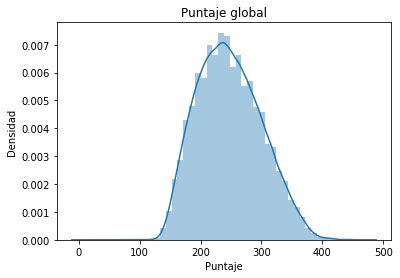

In [32]:
#Distribucion del puntaje global 
data = df_imput['PUNT_GLOBAL']
sns.distplot(data)
plt.title('Puntaje global')
plt.xlabel('Puntaje')
plt.ylabel('Densidad');

### 2.1.2 Genero de los participantes 

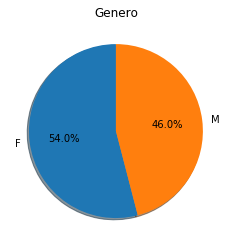

In [33]:
data = df_imput['ESTU_GENERO'].value_counts()/df_imput['ESTU_GENERO'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Genero');

#### 2.1.2.1 Puntaje global - Genero 

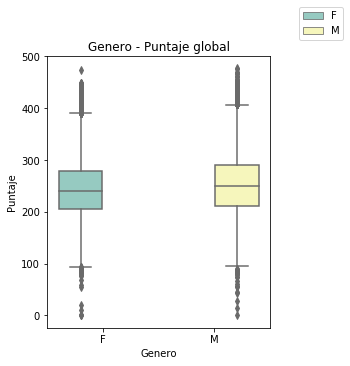

In [34]:
x = 4
y = 5
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="ESTU_GENERO", y= "PUNT_GLOBAL", hue="ESTU_GENERO",
                 data=df_imput, linewidth=1.5, palette="Set3")
plt.title("Genero - Puntaje global")
plt.xlabel("Genero")
plt.ylabel("Puntaje")
plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper right')
plt.show()

### 2.1.3  Etnia

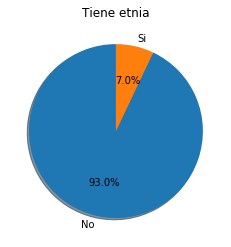

In [35]:
data = df_imput['ESTU_TIENEETNIA'].value_counts()/df_imput['ESTU_TIENEETNIA'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Tiene etnia');

#### 2.1.3.1 Tiene etnia - Puntaje global

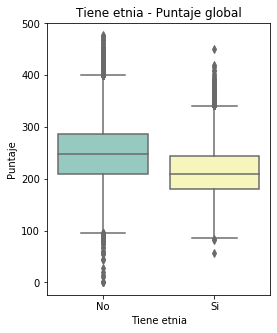

In [36]:
x = 4
y = 5
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="ESTU_TIENEETNIA", y= "PUNT_GLOBAL", 
                 data=df_imput, linewidth=1.5, palette="Set3")
plt.title("Tiene etnia - Puntaje global")
plt.xlabel("Tiene etnia")
plt.ylabel("Puntaje")
plt.show()

### 2.1.4 Caracteristicas por departamento y municipio

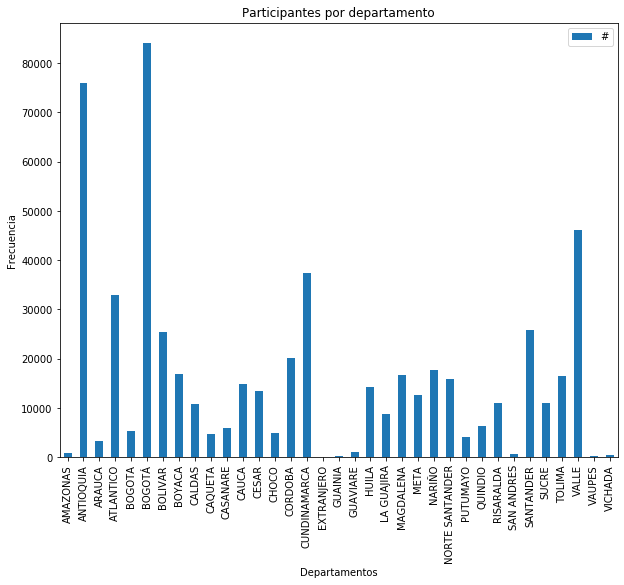

In [37]:
x = 10
y = 8
df_imput[["ESTU_DEPTO_RESIDE", "ESTU_INSE_INDIVIDUAL"]].groupby(["ESTU_DEPTO_RESIDE"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Departamentos") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Participantes por departamento")
plt.show();

#### 2.1.4.1 Top 10 (Cantidad de participantes) Departamento  - Puntaje global

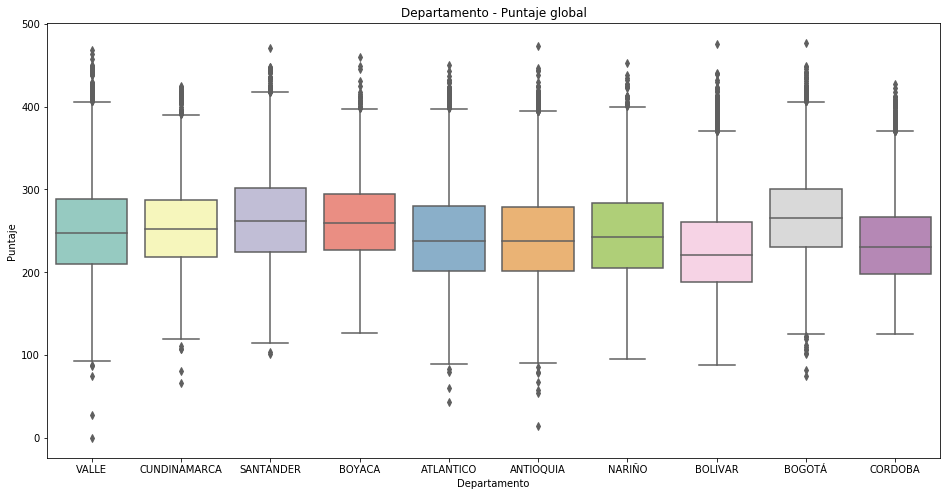

In [38]:
top_10_departamentos = df_imput[["ESTU_DEPTO_RESIDE", "ESTU_INSE_INDIVIDUAL"]].groupby(["ESTU_DEPTO_RESIDE"]).count().sort_values("ESTU_INSE_INDIVIDUAL", ascending=False)[:10]
top = [i for i in top_10_departamentos.index]

data=df_imput[df_imput.ESTU_DEPTO_RESIDE.isin(top)]

x = 16
y = 8
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="ESTU_DEPTO_RESIDE", y= "PUNT_GLOBAL",
                 data=data, linewidth=1.5, palette="Set3")
plt.title("Departamento - Puntaje global")
plt.xlabel("Departamento")
plt.ylabel("Puntaje")
plt.show()

#### 2.1.4.2 top 10 (Cantidad de participantes) Municipios - Puntaje global

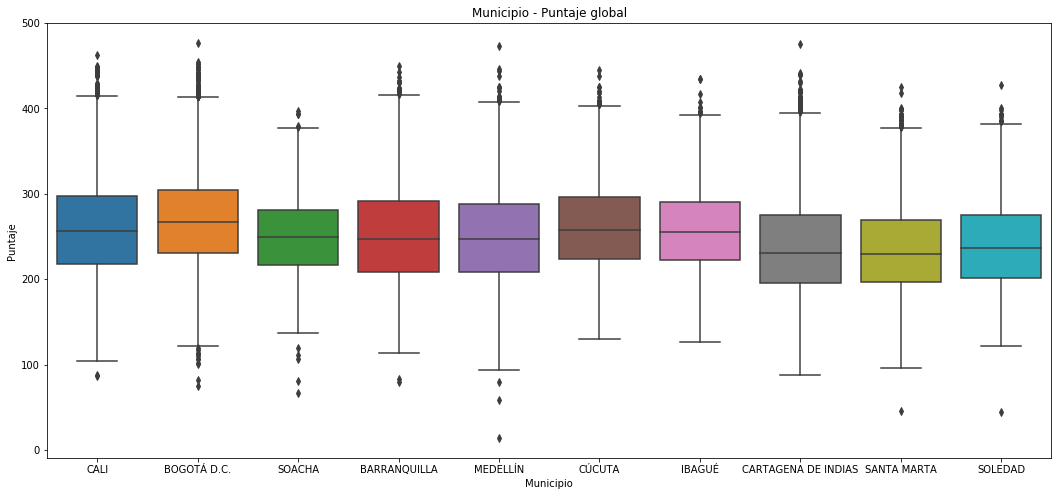

In [39]:
top_10_municipios = df_imput[["ESTU_MCPIO_RESIDE", "ESTU_INSE_INDIVIDUAL"]].groupby(["ESTU_MCPIO_RESIDE"]).count().sort_values("ESTU_INSE_INDIVIDUAL", ascending=False)[:10]
top = [i for i in top_10_municipios.index]

data=df_imput[df_imput.ESTU_MCPIO_RESIDE.isin(top)]

x = 18
y = 8
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="ESTU_MCPIO_RESIDE", y= "PUNT_GLOBAL",
                 data=data, linewidth=1.5)
plt.title("Municipio - Puntaje global")
plt.xlabel("Municipio")
plt.ylabel("Puntaje")
plt.show()

### 2.1.5 Características por Estrato

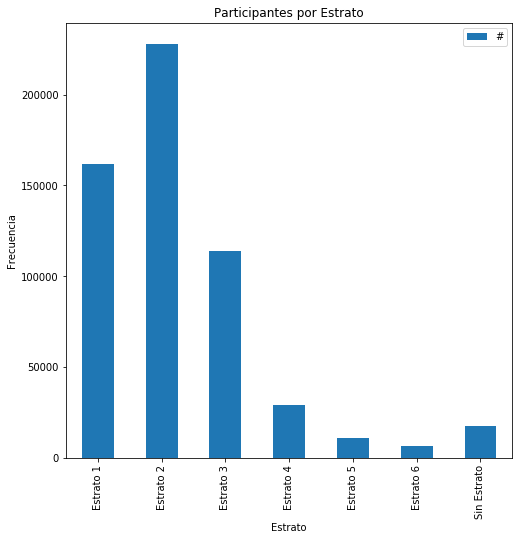

In [40]:
x = 8
y = 8
df_imput[["FAMI_ESTRATOVIVIENDA", "ESTU_INSE_INDIVIDUAL"]].groupby(["FAMI_ESTRATOVIVIENDA"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Estrato") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Participantes por Estrato")
plt.show();

#### 2.1.5.1 Estrato - Puntaje global

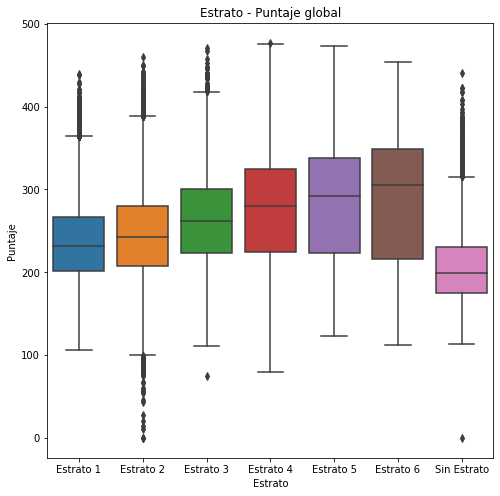

In [41]:
x = 8
y = 8

estratos=[i for i in df_imput["FAMI_ESTRATOVIVIENDA"].unique()]
estratos.sort()

plt.figure(figsize = (x,y))
ax = sns.boxplot(x="FAMI_ESTRATOVIVIENDA", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5, order = estratos )
plt.title("Estrato - Puntaje global")
plt.xlabel("Estrato")
plt.ylabel("Puntaje")
plt.show()

### 2.1.6 Educación  padres

####  Padre y madre

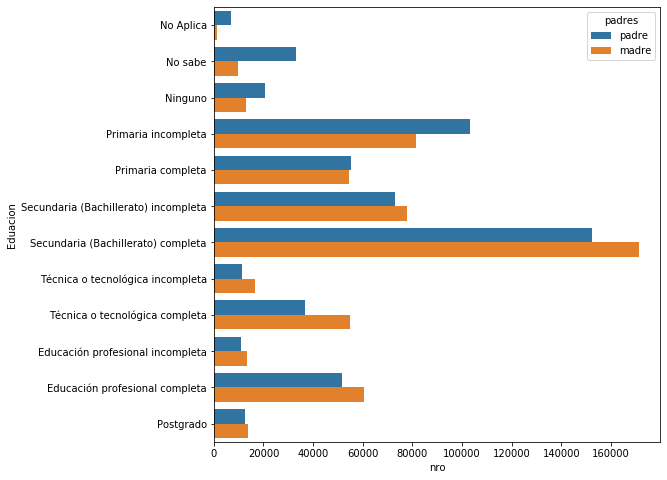

In [42]:
padre=df_imput[["FAMI_EDUCACIONPADRE", "ESTU_INSE_INDIVIDUAL"]].groupby(["FAMI_EDUCACIONPADRE"]).count()
madre=df_imput[["FAMI_EDUCACIONMADRE", "ESTU_INSE_INDIVIDUAL"]].groupby(["FAMI_EDUCACIONMADRE"]).count()

padre_madre = pd.merge(padre,madre, left_index=True,right_index=True, how='inner')
padre_madre=padre_madre.rename_axis('Eduacion').reset_index()
padre_madre=padre_madre.rename(columns={'ESTU_INSE_INDIVIDUAL_x':'padre',
                                   'ESTU_INSE_INDIVIDUAL_y':'madre'})

padre_madre=padre_madre.melt(id_vars=['Eduacion'], var_name = 'padres', value_name = 'nro')

df_imput["FAMI_EDUCACIONMADRE"].unique()
orden = ['No Aplica', 'No sabe','Ninguno', 'Primaria incompleta', 'Primaria completa', 'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa', 
        'Técnica o tecnológica incompleta','Técnica o tecnológica completa','Educación profesional incompleta', 'Educación profesional completa',
        'Postgrado']


x = 8
y = 8
plt.figure(figsize = (x,y))
sns.barplot(y = "Eduacion", x = "nro", hue = "padres", data = padre_madre , order = orden)
plt.show();

#### 2.1.6.1 Educación padre y madre- Puntaje global

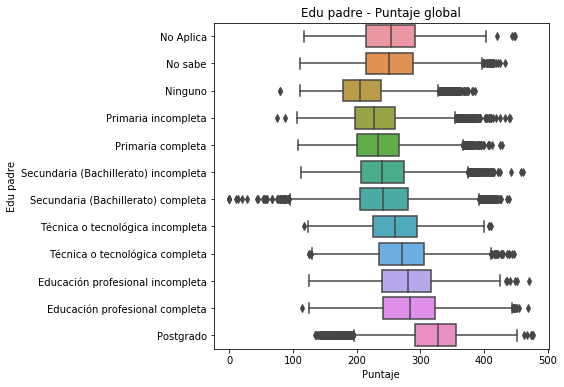

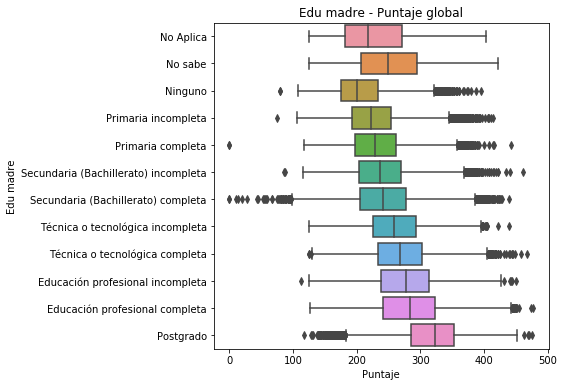

In [43]:
x = 6
y = 6

plt.figure(figsize = (x,y))
ax = sns.boxplot(y="FAMI_EDUCACIONPADRE", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 , order = orden)
plt.title("Edu padre - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("Edu padre")
plt.show();

plt.figure(figsize = (x,y))
ax = sns.boxplot(y="FAMI_EDUCACIONMADRE", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 , order = orden)
plt.title("Edu madre - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("Edu madre")
plt.show();

### 2.1.7 Trabajo padres 

#### Padre y madre

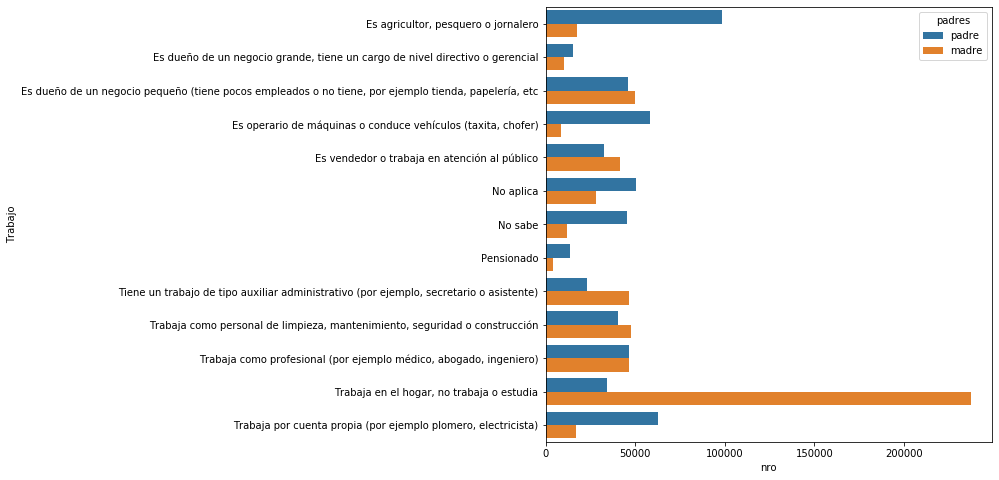

In [44]:
padre=df_imput[["FAMI_TRABAJOLABORPADRE", "ESTU_INSE_INDIVIDUAL"]].groupby(["FAMI_TRABAJOLABORPADRE"]).count()
madre=df_imput[["FAMI_TRABAJOLABORMADRE", "ESTU_INSE_INDIVIDUAL"]].groupby(["FAMI_TRABAJOLABORMADRE"]).count()

padre_madre = pd.merge(padre,madre, left_index=True,right_index=True, how='inner')
padre_madre=padre_madre.rename_axis('Trabajo').reset_index()
padre_madre=padre_madre.rename(columns={'ESTU_INSE_INDIVIDUAL_x':'padre',
                                   'ESTU_INSE_INDIVIDUAL_y':'madre'})

padre_madre=padre_madre.melt(id_vars=['Trabajo'], var_name = 'padres', value_name = 'nro')


x = 8
y = 8
plt.figure(figsize = (x,y))
sns.barplot(y = "Trabajo", x = "nro", hue = "padres", data = padre_madre )
plt.show();
 

#### 2.1.7.1 Trabajo padre y madre- Puntaje global

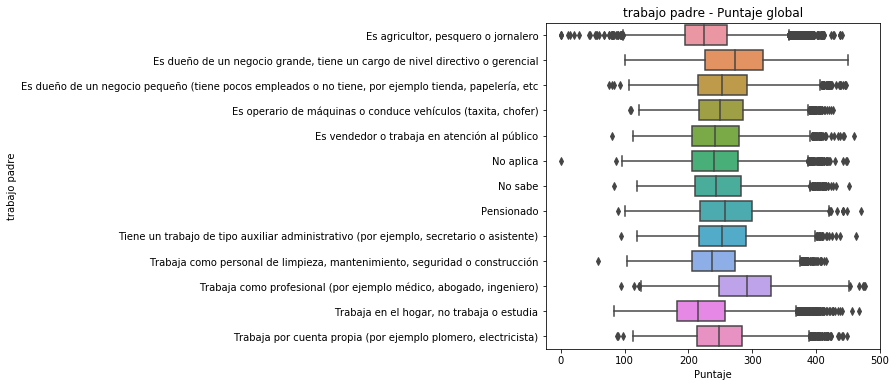

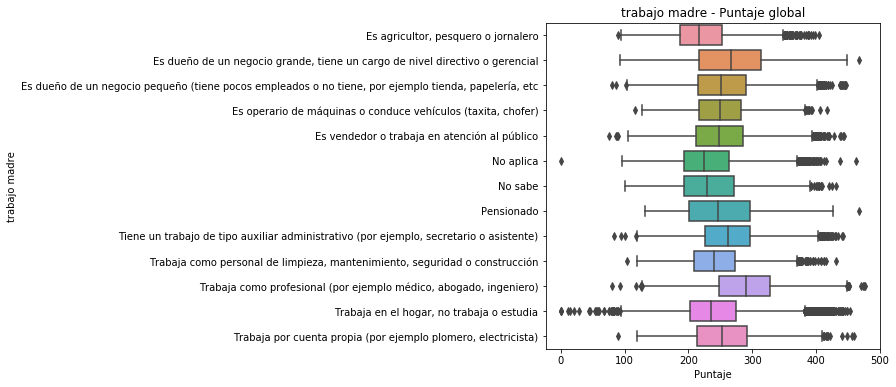

In [45]:
x = 6
y = 6


trabajos = df_imput["FAMI_TRABAJOLABORPADRE"].unique()
trabajos.sort()

plt.figure(figsize = (x,y))
ax = sns.boxplot(y="FAMI_TRABAJOLABORPADRE", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 , order = trabajos)
plt.title("trabajo padre - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("trabajo padre")
plt.show();

plt.figure(figsize = (x,y))
ax = sns.boxplot(y="FAMI_TRABAJOLABORMADRE", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5, order = trabajos )
plt.title("trabajo madre - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("trabajo madre")
plt.show();

### 2.1.8 Familia tiene internet

,FAMI_TIENEINTERNET
FAMI_TIENEINTERNET,
No,203665
Si,363630


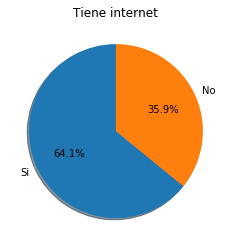

In [46]:
data = df_imput['FAMI_TIENEINTERNET'].value_counts()/df_imput['FAMI_TIENEINTERNET'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Tiene internet');
df_imput[['FAMI_TIENEINTERNET']].groupby(df_imput["FAMI_TIENEINTERNET"]).count()

#### 2.1.8.1 tiene internet - Puntaje global

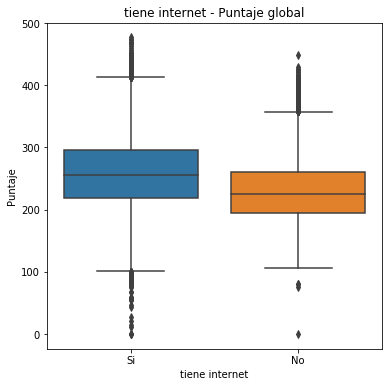

In [47]:
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="FAMI_TIENEINTERNET", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 )
plt.title("tiene internet - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("tiene internet")
plt.show();

### 2.1.9 Nro de libros por familia 

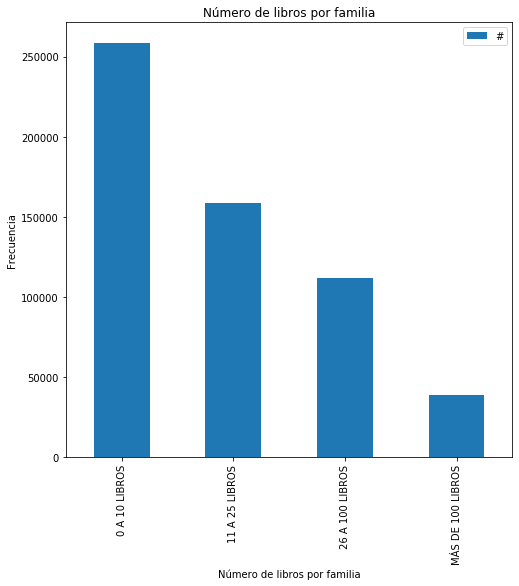

In [48]:
x=8
y=8
df_imput[['FAMI_NUMLIBROS']].groupby(df_imput["FAMI_NUMLIBROS"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Número de libros por familia") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Número de libros por familia")
plt.show();

#### 2.1.9.1 Nro libros - Puntaje global

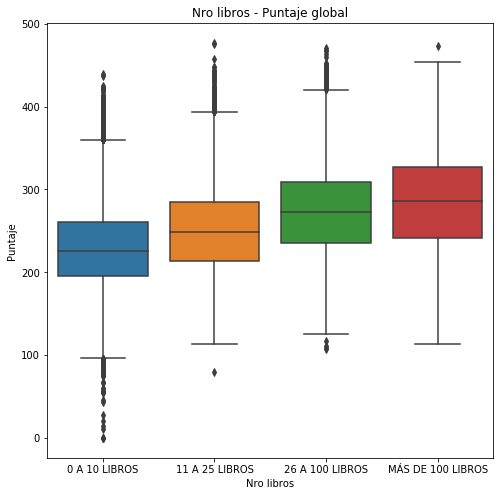

In [49]:
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="FAMI_NUMLIBROS", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 , order = ['0 A 10 LIBROS', '11 A 25 LIBROS', '26 A 100 LIBROS', 'MÁS DE 100 LIBROS' ])
plt.title("Nro libros - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("Nro libros")
plt.show();

### 2.1.10 Alimentación

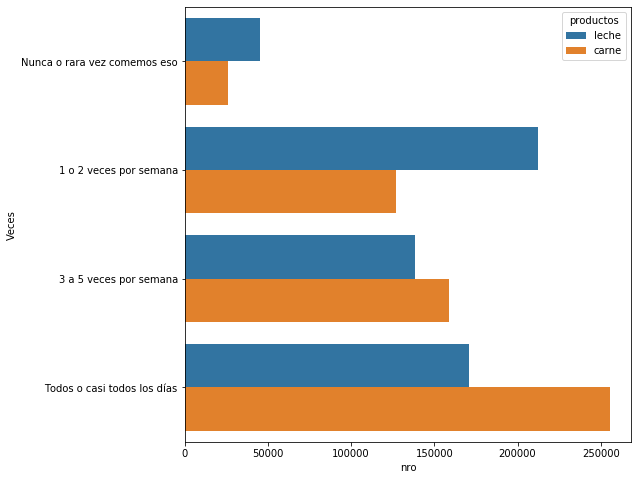

In [50]:
df_imput['FAMI_COMELECHEDERIVADOS'].unique()

leche=df_imput[["FAMI_COMELECHEDERIVADOS", "ESTU_INSE_INDIVIDUAL"]].groupby(["FAMI_COMELECHEDERIVADOS"]).count()
carne=df_imput[["FAMI_COMECARNEPESCADOHUEVO", "ESTU_INSE_INDIVIDUAL"]].groupby(["FAMI_COMECARNEPESCADOHUEVO"]).count()

leche_carne = pd.merge(leche,carne, left_index=True,right_index=True, how='inner')
leche_carne=leche_carne.rename_axis('Veces').reset_index()
leche_carne=leche_carne.rename(columns={'ESTU_INSE_INDIVIDUAL_x':'leche',
                                   'ESTU_INSE_INDIVIDUAL_y':'carne'})

leche_carne=leche_carne.melt(id_vars=['Veces'], var_name = 'productos', value_name = 'nro')

x = 8
y = 8
plt.figure(figsize = (x,y))
sns.barplot(y = "Veces", x = "nro", hue = "productos", data = leche_carne, 
            order = ['Nunca o rara vez comemos eso', '1 o 2 veces por semana','3 a 5 veces por semana', 'Todos o casi todos los días'])
plt.show();


#### 2.1.10.1  leche derivados - Puntaje global / Carne pescado y huevo - Puntaje global

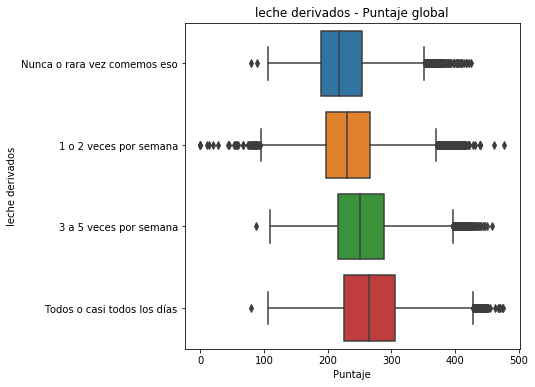

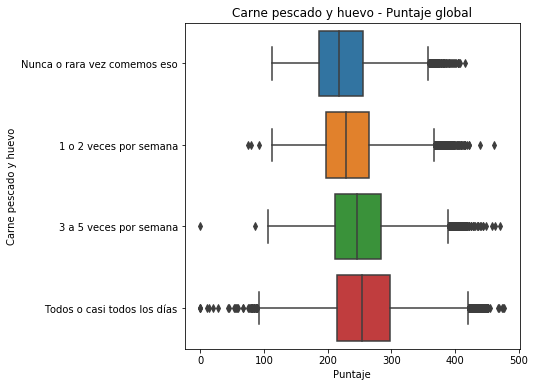

In [51]:
x = 6
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(y="FAMI_COMELECHEDERIVADOS", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5,order = ['Nunca o rara vez comemos eso', '1 o 2 veces por semana','3 a 5 veces por semana', 'Todos o casi todos los días'] )
plt.title("leche derivados - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("leche derivados")
plt.show();

plt.figure(figsize = (x,y))
ax = sns.boxplot(y="FAMI_COMECARNEPESCADOHUEVO", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5, order = ['Nunca o rara vez comemos eso', '1 o 2 veces por semana','3 a 5 veces por semana', 'Todos o casi todos los días'])
plt.title("Carne pescado y huevo - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("Carne pescado y huevo")
plt.show();

### 2.1.11 Situación socioeconómica de la familia del estudiante

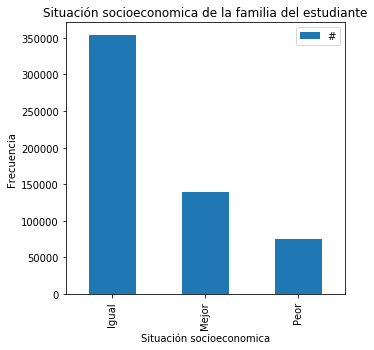

In [52]:
x=5
y=5
df_imput[["FAMI_SITUACIONECONOMICA"]].groupby(df_imput["FAMI_SITUACIONECONOMICA"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Situación socioeconomica") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Situación socioeconomica de la familia del estudiante")
plt.show();

#### 2.1.11.1 Situación socioeconomica de la familia del estudiante - Puntaje global

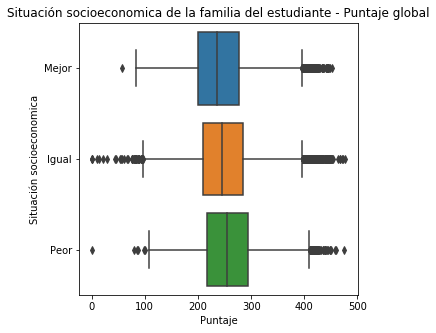

In [53]:
x = 5
y = 5
plt.figure(figsize = (x,y))
ax = sns.boxplot(y="FAMI_SITUACIONECONOMICA", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 )
plt.title("Situación socioeconomica de la familia del estudiante - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("Situación socioeconomica")
plt.show();

### 2.1.12.1 Dedicación estudio (tiempo)

#### Lectura

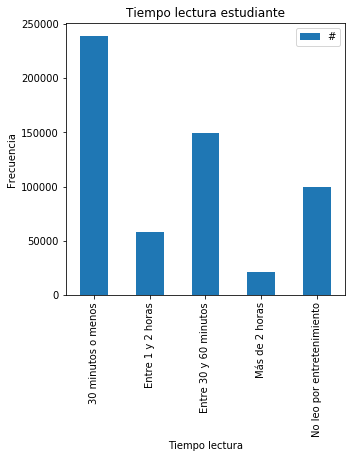

In [54]:
df_imput[["ESTU_DEDICACIONLECTURADIARIA"]].groupby(df_imput["ESTU_DEDICACIONLECTURADIARIA"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Tiempo lectura") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Tiempo lectura estudiante")
plt.show();

#### lectura - Puntaje global

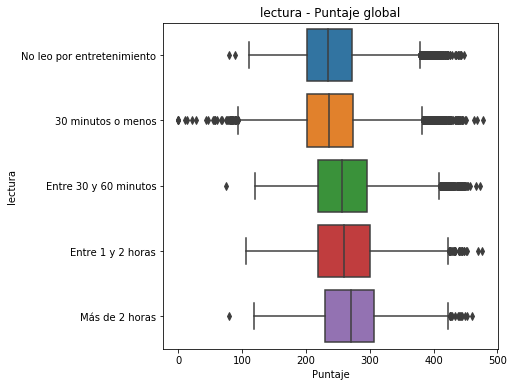

In [55]:
x = 6
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(y="ESTU_DEDICACIONLECTURADIARIA", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5, order = ['No leo por entretenimiento', '30 minutos o menos', 'Entre 30 y 60 minutos', 'Entre 1 y 2 horas','Más de 2 horas' ] )
plt.title("lectura - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("lectura")
plt.show();

#### Internet

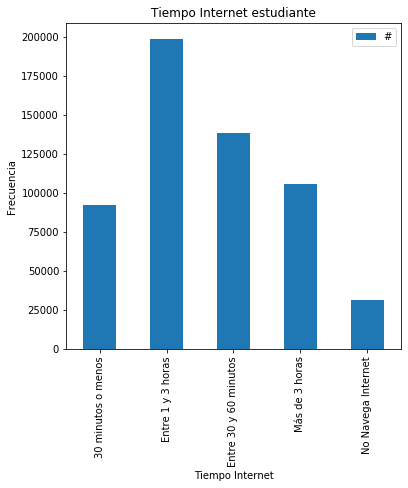

In [56]:
df_imput[["ESTU_DEDICACIONINTERNET"]].groupby(df_imput["ESTU_DEDICACIONINTERNET"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Tiempo Internet") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Tiempo Internet estudiante")
plt.show();

#### Internet - Puntaje global

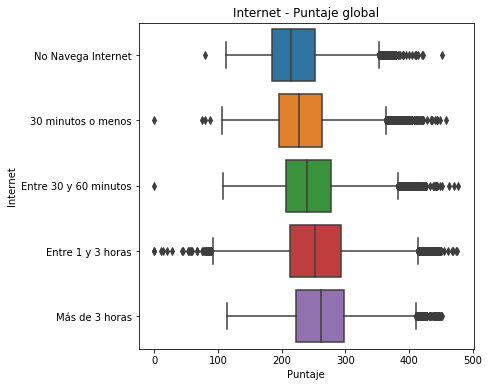

In [57]:
x = 6
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(y="ESTU_DEDICACIONINTERNET", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5, order = ['No Navega Internet', '30 minutos o menos',  'Entre 30 y 60 minutos', 'Entre 1 y 3 horas','Más de 3 horas' ] )
plt.title("Internet - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("Internet")
plt.show();

### 2.1.13 colegio del estudiante

#### Naturaleza

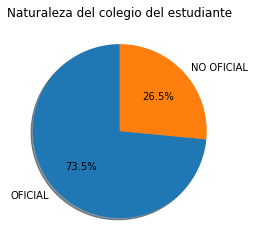

In [58]:
data = df_imput['COLE_NATURALEZA'].value_counts()/df_imput['COLE_NATURALEZA'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Naturaleza del colegio del estudiante');                

#### Naturaleza colegio del estudiante - Puntaje global

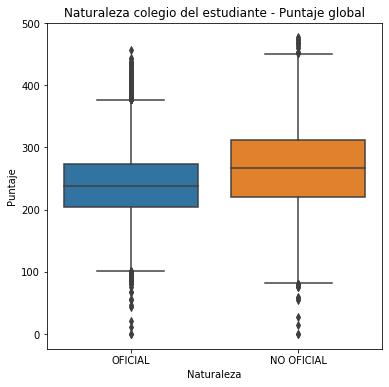

In [59]:
x = 6
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="COLE_NATURALEZA", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 )
plt.title("Naturaleza colegio del estudiante - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("Naturaleza")
plt.show();

#### Si es bilingue

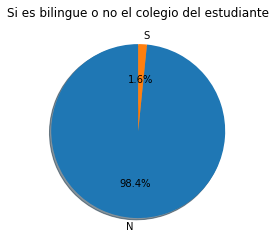

In [60]:
data = df_imput['COLE_BILINGUE'].value_counts()/df_imput['COLE_BILINGUE'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Si es bilingue o no el colegio del estudiante');

#### Si es bilingue o no el colegio del estudiante - Puntaje global

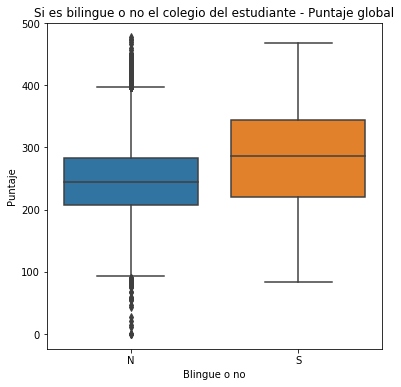

In [61]:
x = 6
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="COLE_BILINGUE", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 )
plt.title("Si es bilingue o no el colegio del estudiante - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("Blingue o no")
plt.show();

#### Caracter

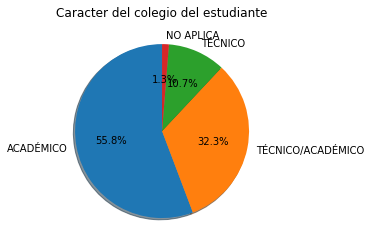

In [62]:
data = df_imput['COLE_CARACTER'].value_counts()/df_imput['COLE_CARACTER'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Caracter del colegio del estudiante');

#### Caracter del colegio del estudiante - Puntaje global

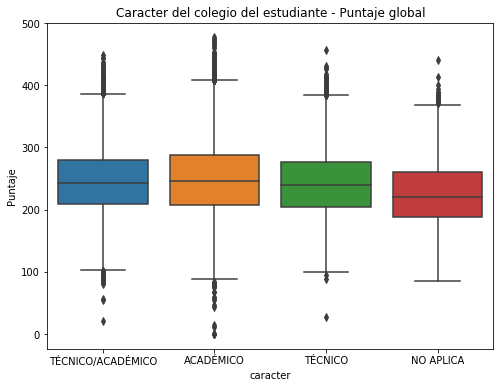

In [63]:
x = 8
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="COLE_CARACTER", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 )
plt.title("Caracter del colegio del estudiante - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("caracter")
plt.show();

#### Jornada del colegio del estudiante

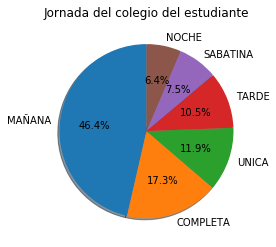

In [64]:
data = df_imput['COLE_JORNADA'].value_counts()/df_imput['COLE_JORNADA'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Jornada del colegio del estudiante');

#### Jornada del colegio del estudiante - Puntaje global

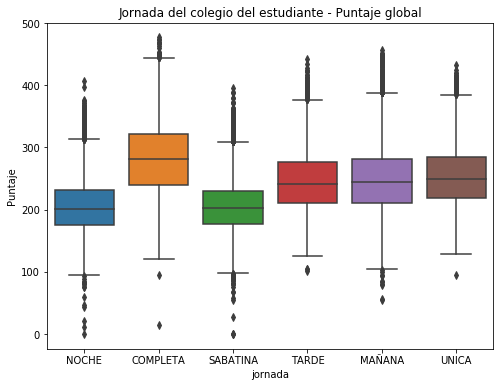

In [65]:
x = 8
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="COLE_JORNADA", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 )
plt.title("Jornada del colegio del estudiante - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("jornada")
plt.show();

### 2.1.14 Puntaje global del estudiante, Indice total del colegio e  Índice Socioeconómico del evaluado 

#### matriz de Correlaciones y mapa de calor 

,PUNT_GLOBAL,indice_total_colegio,ESTU_INSE_INDIVIDUAL
PUNT_GLOBAL,1.000000,0.556189,0.463023
indice_total_colegio,0.556189,1.000000,0.533327
ESTU_INSE_INDIVIDUAL,0.463023,0.533327,1.000000


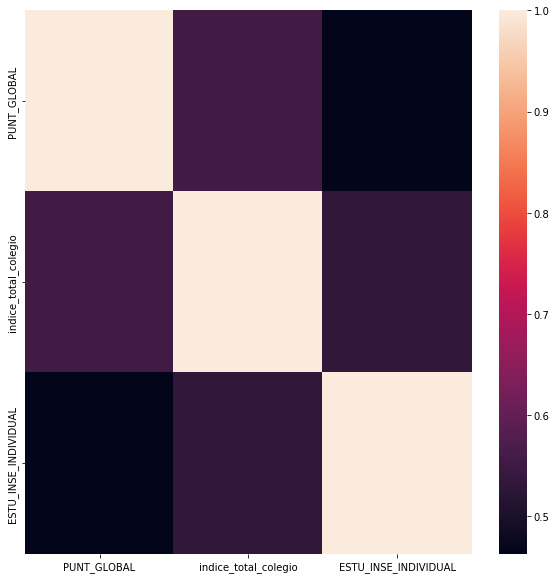

In [66]:
corr_df = df_imput[["PUNT_GLOBAL",  "indice_total_colegio", "ESTU_INSE_INDIVIDUAL"]]
corr =corr_df.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr)
df_imput[["PUNT_GLOBAL",  "indice_total_colegio", "ESTU_INSE_INDIVIDUAL"]].corr()

#### Posibles relaciones lineales entre la varibles

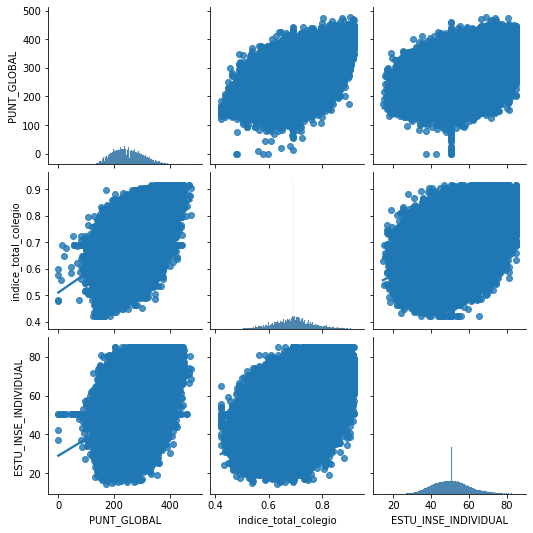

In [67]:
sns.pairplot(df_imput[["PUNT_GLOBAL",  "indice_total_colegio", "ESTU_INSE_INDIVIDUAL"]], kind="reg")
plt.show()

### 2.1.15 Categoría colegio del estudiante

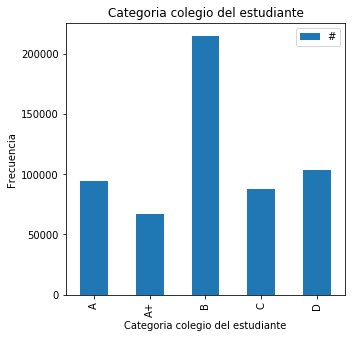

In [68]:
x = 5
y = 5
df_imput[["colegio_categoria"]].groupby(df_imput["colegio_categoria"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Categoria colegio del estudiante") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Categoria colegio del estudiante")
plt.show();

#### 2.1.15.1 Categoría colegio del estudiante - Puntaje global

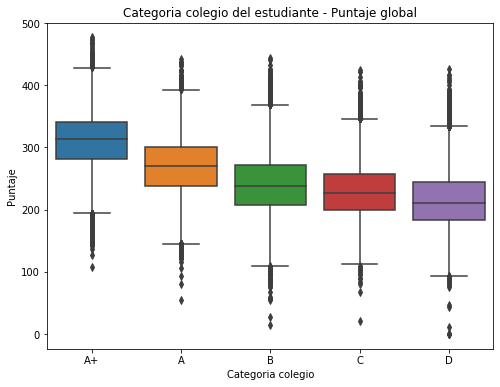

In [69]:
x = 8
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="colegio_categoria", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5, order = ["A+", "A", "B", "C", "D"] )
plt.title("Categoria colegio del estudiante - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("Categoria colegio")
plt.show();

### 2.1.16 Agrupación departamentos por regiones

In [70]:
 def regiones (x, var1, var2):
    if x[var1] == 'ANTIOQUIA' or x[var1] == 'BOYACA' or x[var1] == 'CALDAS'  or x[var1] == 'CUNDINAMARCA' or x[var1] == 'HUILA'  or x[var1] == 'NORTE SANTANDER' or x[var1] == 'QUINDIO' or x[var1] =='RISARALDA'  or x[var1] == 'SANTANDER' or x[var1] == 'TOLIMA' :
        x[var2] = "ANDINA"
    elif x[var1] == 'AMAZONAS' or x[var1] == 'CAQUETA' or x[var1] == 'GUAINIA' or x[var1] == 'GUAVIARE' or x[var1] == 'VAUPES'   or x[var1] == 'PUTUMAYO':
        x[var2]= "AMAZONIA"
    elif x[var1] == 'ATLANTICO' or x[var1] == 'BOLIVAR' or x[var1] == 'CESAR' or x[var1] == 'CORDOBA' or x[var1] == 'LA GUAJIRA' or x[var1] == 'MAGDALENA' or x[var1] == 'SUCRE':
        x[var2] = "CARIBLE"
    elif x[var1] == 'SAN ANDRES':
        x[var2] = 'INSULAR'
    elif x[var1] == 'ARAUCA' or x[var1] == 'CASANARE'   or x[var1] == 'META' or x[var1] == 'VICHADA':
        x[var2] = 'ORINOQUIA'
    elif x[var1] =='CAUCA'   or x[var1] == 'VALLE'  or x[var1] == 'CHOCO' or  x[var1] == 'NARIÑO':
        x[var2] = 'PACIFICO'
    elif x[var1] =='BOGOTA'   or x[var1] == 'BOGOTÁ':
        x[var2] = 'BOGOTA'
    else:
        x[var2] = x[var1]
    return x

df_imput = df_imput.apply(lambda x: regiones(x, "ESTU_DEPTO_RESIDE", "regiones" ), axis = 1)
df_imput["regiones"].unique()


array(['PACIFICO', 'BOGOTA', 'ANDINA', 'AMAZONIA', 'CARIBLE', 'ORINOQUIA',
       'INSULAR', 'EXTRANJERO'], dtype=object)

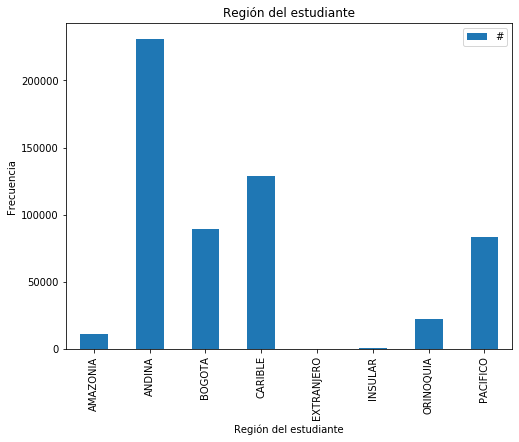

In [71]:
df_imput[["regiones"]].groupby(df_imput["regiones"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Región del estudiante") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Región del estudiante")
plt.show();

#### 2.1.16.1 región  del estudiante - Puntaje global

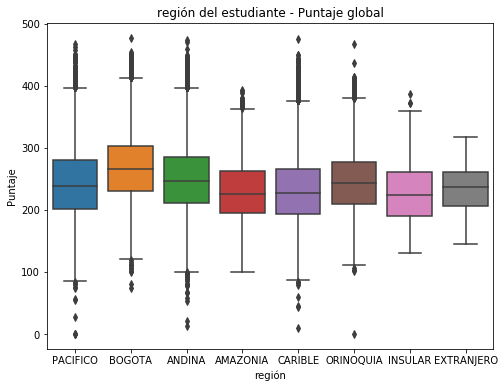

In [72]:
x = 8
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="regiones", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 )
plt.title("región del estudiante - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("región")
plt.show();

## Resumen 

En términos generales, la distribución de la variable Puntaje global del estudiante respecto a las variables escogidas que podrían explicar a esta, en cada nivel de estas variables, existen diferencias observables en la distribución del   Puntaje global para cada variable en cada nivel. En otras palabras, las distribuciones del Puntaje global presentan cambios para cada categoría de las diferentes variables escogidas. De tal forma, es probable que los diferentes niveles de cada variable, puede explicar a la variable Puntaje global. 

Por otra parte, las variables numéricas -Índice socioeconómico del estudiante e índice del colegio del estudiante – tienen una correlación moderada respecto al “Puntaje global” del estudiante. Asimismo, entre ellas, esta misma correlación se mantiene.
Por último, la variable departamento, se agrupo en zonas correspondientes a las regiones naturales del país. Esto, con el fin de minimizar el espacio vectorial que se puede generar al convertirlas en Dummy para el análisis y desarrollo de modelo analítico posterior.


### Transformación de variables categóricas en dummy para el posterior desarrollo del modelo 

In [73]:
df_final=df_imput[["ESTU_GENERO", "ESTU_TIENEETNIA", "FAMI_ESTRATOVIVIENDA", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE", "FAMI_TIENEINTERNET", "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_SITUACIONECONOMICA", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET", "COLE_NATURALEZA", "COLE_BILINGUE", "COLE_JORNADA", "PUNT_GLOBAL", "PERCENTIL_GLOBAL", "ESTU_INSE_INDIVIDUAL",  "colegio_categoria", "indice_total_colegio", "regiones"  ]]
df_final = pd.get_dummies(df_final, columns = ["ESTU_GENERO", "ESTU_TIENEETNIA", "FAMI_ESTRATOVIVIENDA", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE", "FAMI_TIENEINTERNET", "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_SITUACIONECONOMICA", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET", "COLE_NATURALEZA", "COLE_BILINGUE", "COLE_JORNADA",  "colegio_categoria" ,"regiones"], drop_first  = True)
df_final.head(5)

,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,indice_total_colegio,ESTU_GENERO_M,ESTU_TIENEETNIA_Si,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,...,colegio_categoria_B,colegio_categoria_C,colegio_categoria_D,regiones_ANDINA,regiones_BOGOTA,regiones_CARIBLE,regiones_EXTRANJERO,regiones_INSULAR,regiones_ORINOQUIA,regiones_PACIFICO
ESTU_CONSECUTIVO,,,,,,,,,,,,,,,,,,,,,
SB11201910008548,235,29.0,58.199483,0.61015,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
SB11201910004475,217,21.0,51.018527,0.61015,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
SB11201910011427,246,34.0,50.855657,0.61015,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
SB11201910041975,255,38.0,52.688203,0.61015,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
SB11201910014490,280,48.0,73.930829,0.86790,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Dado que el espacio vectorial aumento considereblemente (de 25 a 96 variables) por la transfomación de la variables categóricas a dummys, se considera un entrenamiento de un modelo PCA para reducir la dimensionalidad del conjunto de datos de las variables predictoras 

## Entrenamiento modelo PCA con escalado de los datos

In [74]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
df_dum = df_final.iloc[:, 4:]
model_pca = PCA(n_components=10)             
model_pca.fit(df_dum)                      
X_10D = model_pca.transform(df_dum)  
df_dum.head()

,ESTU_GENERO_M,ESTU_TIENEETNIA_Si,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,...,colegio_categoria_B,colegio_categoria_C,colegio_categoria_D,regiones_ANDINA,regiones_BOGOTA,regiones_CARIBLE,regiones_EXTRANJERO,regiones_INSULAR,regiones_ORINOQUIA,regiones_PACIFICO
ESTU_CONSECUTIVO,,,,,,,,,,,,,,,,,,,,,
SB11201910008548,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
SB11201910004475,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
SB11201910011427,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
SB11201910041975,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
SB11201910014490,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [75]:
#componentes principales      
df_pca=pd.DataFrame(
    data    = X_10D,
    columns = ["pc" + str(i) for i in range(1,11)],
    index = [i for i in resultatos_saber11_2019["ESTU_CONSECUTIVO"] ]
)
df_pca.head() 


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
SB11201910008548,0.083496,-0.076098,-0.617240,-0.125601,0.878068,-0.090226,-0.131511,0.170889,0.531089,-0.768264
SB11201910004475,0.292331,-0.358804,-0.655959,0.125630,0.423809,-0.180680,0.249765,0.374188,0.334266,1.245596
SB11201910011427,-0.468747,-0.020725,0.054137,-0.263801,0.121380,-0.441968,0.418395,-0.032844,-1.340394,-0.061450
SB11201910041975,-0.272920,-0.044023,-0.220981,0.187011,-0.001887,-0.577157,0.601443,0.397004,-0.729736,-0.678726
SB11201910014490,1.358891,0.564758,-0.710440,0.576736,0.728430,-0.473832,-0.718272,0.304523,0.288459,-0.447023


In [76]:
df_pca.shape

(567295, 10)

In [77]:
df_pca_final = pd.merge(df_final.iloc[:, :4], df_pca, left_index=True,right_index=True, how='inner' )
df_pca_final.head()

,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,indice_total_colegio,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
SB11201910008548,235,29.0,58.199483,0.61015,0.083496,-0.076098,-0.617240,-0.125601,0.878068,-0.090226,-0.131511,0.170889,0.531089,-0.768264
SB11201910004475,217,21.0,51.018527,0.61015,0.292331,-0.358804,-0.655959,0.125630,0.423809,-0.180680,0.249765,0.374188,0.334266,1.245596
SB11201910011427,246,34.0,50.855657,0.61015,-0.468747,-0.020725,0.054137,-0.263801,0.121380,-0.441968,0.418395,-0.032844,-1.340394,-0.061450
SB11201910041975,255,38.0,52.688203,0.61015,-0.272920,-0.044023,-0.220981,0.187011,-0.001887,-0.577157,0.601443,0.397004,-0.729736,-0.678726
SB11201910014490,280,48.0,73.930829,0.86790,1.358891,0.564758,-0.710440,0.576736,0.728430,-0.473832,-0.718272,0.304523,0.288459,-0.447023


In [78]:
print("filas, columnas resultantes de la base final")
print(df_pca_final.shape)

filas, columnas resultantes de la base final
(567295, 14)


## Resumen

Posterior a la obtención de las variables Dummy, se estimo un modelo PCA con el fin de reducir el espacio vectorial del conjunto de datos previo resultante. Sin embargo, se estimarán dos modelos: Uno con todas las variables y otro con las variables PCA. 

El nuevo set de variables corresponde a un total de 14, en donde el modelo PCA solo se realizó para variables dummy. Las numéricas no se les hizo ningún tratamiento.

El fin de estimar dos modelos es ponerlos a competir para ver cual de los dos tiene el mejor desempeño, sin embargo, otra de las razones, es la difícil interpretabilidad de las variables resultantes del PCA. 


# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

# 3.1 Modelo de clasificación para predecir que estudiante tendrá un desempeño positivo (Puntaje > 250)


Dado que los puntajes  superiores a 250 son positivos y favolrables, se busca clasificar a los estudiantes, dadas unas variables predictoras, si tienen un resultado positivo (1), de lo contrario (0).

Para esto se plantea usar variables demográficas y algunas referentes a índices del colegio y socioeconómicos del estudiante, que puedan predecir si su puntaje será positivo y mayor a 250. 

Asimismo, se plantea evaluar y estimar diferentes modelos y ver cuál de estos, se ajusta mejor. 

Las variables tenidas en cuenta para la estimación del modelo, tiene como característica principal, que para los resultados globales, en cada nivel de las diferentes variables, se ven diferenciaciones significativas que pueden explicar el desempeño del estudiante en la prueba.

Para la estimación de los diferentes modelos se tendran en cuenta dos conjuntos de datos:
- Un conjuntos de datos al cual se le hizo un PCA para reducir la dimensionalidad vectorial generada por las variables dummy. 
- Un conjunto de datos con todas la variables (94 variables despues de transfomar en dummy las variables categóricas). 

De acuerdo al desempeño y a la interpretabilidad de las variables, se escogera un modelo. El criterio para escoger el modelo es el AUC.


### Base con todas las variables 

In [79]:
#base completa 
df_completo = df_final.drop(["PERCENTIL_GLOBAL"], axis = 1)
df_completo["y"] = (df_completo["PUNT_GLOBAL"] > 250)*1
df_completo.head()

,PUNT_GLOBAL,ESTU_INSE_INDIVIDUAL,indice_total_colegio,ESTU_GENERO_M,ESTU_TIENEETNIA_Si,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,...,colegio_categoria_C,colegio_categoria_D,regiones_ANDINA,regiones_BOGOTA,regiones_CARIBLE,regiones_EXTRANJERO,regiones_INSULAR,regiones_ORINOQUIA,regiones_PACIFICO,y
ESTU_CONSECUTIVO,,,,,,,,,,,,,,,,,,,,,
SB11201910008548,235,58.199483,0.61015,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
SB11201910004475,217,51.018527,0.61015,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
SB11201910011427,246,50.855657,0.61015,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
SB11201910041975,255,52.688203,0.61015,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
SB11201910014490,280,73.930829,0.86790,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


   ### Definir variable objetivo del modelo PCA

In [80]:
#definir variable objetivo del modelo_pca
df_pca_final["y"] = (df_pca_final["PUNT_GLOBAL"] > 250)*1 
df_pca_final.head()

,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,indice_total_colegio,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,y
SB11201910008548,235,29.0,58.199483,0.61015,0.083496,-0.076098,-0.617240,-0.125601,0.878068,-0.090226,-0.131511,0.170889,0.531089,-0.768264,0
SB11201910004475,217,21.0,51.018527,0.61015,0.292331,-0.358804,-0.655959,0.125630,0.423809,-0.180680,0.249765,0.374188,0.334266,1.245596,0
SB11201910011427,246,34.0,50.855657,0.61015,-0.468747,-0.020725,0.054137,-0.263801,0.121380,-0.441968,0.418395,-0.032844,-1.340394,-0.061450,0
SB11201910041975,255,38.0,52.688203,0.61015,-0.272920,-0.044023,-0.220981,0.187011,-0.001887,-0.577157,0.601443,0.397004,-0.729736,-0.678726,1
SB11201910014490,280,48.0,73.930829,0.86790,1.358891,0.564758,-0.710440,0.576736,0.728430,-0.473832,-0.718272,0.304523,0.288459,-0.447023,1


# Modelo Logit 1 

## Base entrenamiento y test - Modelo con variables PCA 

In [81]:
#Variables predictoras 
X = df_pca_final.iloc[:, 2:df_pca_final.shape[1]-1]
#Variable respuesta 
y = df_pca_final[["y"]]

In [82]:
X.dtypes, y.dtypes

(ESTU_INSE_INDIVIDUAL    float64
 indice_total_colegio    float64
 pc1                     float64
 pc2                     float64
 pc3                     float64
 pc4                     float64
 pc5                     float64
 pc6                     float64
 pc7                     float64
 pc8                     float64
 pc9                     float64
 pc10                    float64
 dtype: object,
 y    int32
 dtype: object)

### Entrenamiento y test del modelo 

In [83]:
#Entrenamiento y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =123)
# Declaramos una instancia del modelo
lr = LogisticRegression()
#entrenar el modelo 
lr.fit(X_train, y_train)
# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

### Desempeño del modelo

In [84]:
matriz = confusion_matrix(y_test, y_pred)
pd.DataFrame({
                '1': [matriz[0][0], matriz[1][0]],
                '0': [matriz[0][1], matriz[1][1]]
                 },
            index = [1,0]
)
#matriz

,1,0
1,50683,11273
0,21033,30470


#### Reporte del modelo de clasificación Logit 1 

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76     61956
           1       0.73      0.59      0.65     51503

    accuracy                           0.72    113459
   macro avg       0.72      0.70      0.71    113459
weighted avg       0.72      0.72      0.71    113459



#### Accuracy

In [86]:
print('Accuracy del modelo:')
print(lr.score(X_test, y_test))

Accuracy del modelo:
0.7152627821503803


#### Precisión

In [87]:
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.729942744891359


#### Calculo la curva ROC - AUC del modelo

Regresión Logística: ROC AUC=  0.7828744591965415


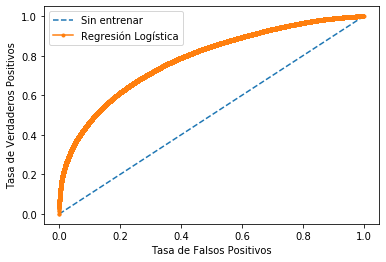

In [88]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(X_test)

# PREDECIR las probabilidades
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('Regresión Logística: ROC AUC= ' ,lr_auc)

#  las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

#  las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

### Coeficientes

In [89]:
intercepto=pd.DataFrame(
    data = lr.intercept_.T,
    columns  =  ["Coeficientes"],
    index = ["intercept"]
)

coeficientes=pd.DataFrame(
    data = lr.coef_.T,
    columns  =  ["Coeficientes"],
    index = X_test.columns
)

intercepto.append(coeficientes)

,Coeficientes
intercept,-12.751102
ESTU_INSE_INDIVIDUAL,0.046271
indice_total_colegio,14.818637
pc1,-0.078463
pc2,0.091523
pc3,-0.224501
pc4,-0.158640
pc5,0.194090
pc6,0.478404
pc7,0.072808


# Modelo Logit 2

## Base entrenamiento y test - Modelo con todas las variables

In [90]:
#Variables predictoras 
X2 = df_completo.iloc[:, 1:df_completo.shape[1]-1]
#Variable respuesta 
y2 = df_completo[["y"]]

In [91]:
X2.dtypes, y2.dtypes

(ESTU_INSE_INDIVIDUAL              float64
 indice_total_colegio              float64
 ESTU_GENERO_M                       uint8
 ESTU_TIENEETNIA_Si                  uint8
 FAMI_ESTRATOVIVIENDA_Estrato 2      uint8
                                    ...   
 regiones_CARIBLE                    uint8
 regiones_EXTRANJERO                 uint8
 regiones_INSULAR                    uint8
 regiones_ORINOQUIA                  uint8
 regiones_PACIFICO                   uint8
 Length: 94, dtype: object,
 y    int32
 dtype: object)

### Entrenamiento y test del modelo 

In [92]:
#Entrenamiento y test 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state =123)
# Declaramos una instancia del modelo
lr2 = LogisticRegression()
#entrenar el modelo 
lr2.fit(X2_train, y2_train)
# Utilizamos el modelo para predecir
y2_pred = lr2.predict(X2_test)

### Desempeño del modelo

#### Matriz de confusión

In [93]:
matriz = confusion_matrix(y2_test, y2_pred)

pd.DataFrame({
                '1': [matriz[0][0], matriz[1][0]],
                '0': [matriz[0][1], matriz[1][1]]
                 },
            index = [1,0]
)


,1,0
1,49465,12491
0,17035,34468


#### Reporte del modelo de clasificación Logit 2

In [94]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77     61956
           1       0.73      0.67      0.70     51503

    accuracy                           0.74    113459
   macro avg       0.74      0.73      0.74    113459
weighted avg       0.74      0.74      0.74    113459



#### Accuracy

In [95]:
print('Accuracy del modelo:')
print(lr2.score(X2_test, y2_test))

Accuracy del modelo:
0.7397650252514124


#### Precisión

In [96]:
precision = precision_score(y2_test, y2_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.7340020017462041


#### Calculo la curva ROC - AUC del modelo

Regresión Logística: ROC AUC=  0.8188172859500964


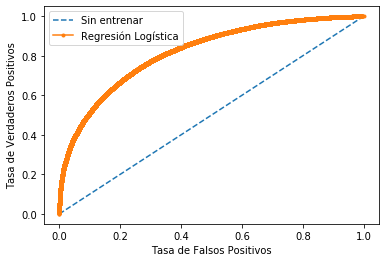

In [97]:
ns_probs2 = [0 for _ in range(len(y2_test))]
lr_probs2 = lr2.predict_proba(X2_test)

# PREDECIR las probabilidades
lr_probs2 = lr_probs2[:, 1]

ns_auc2 = roc_auc_score(y2_test, ns_probs2)
lr_auc2 = roc_auc_score(y2_test, lr_probs2)

print('Regresión Logística: ROC AUC= ' ,lr_auc2)

#  las curvas ROC
ns_fpr2, ns_tpr2, _ = roc_curve(y2_test, ns_probs2)
lr_fpr2, lr_tpr2, _ = roc_curve(y2_test, lr_probs2)

#  las curvas ROC
pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

### Coeficientes

In [98]:
intercepto=pd.DataFrame(
    data = lr2.intercept_.T,
    columns  =  ["Coeficientes"],
    index = ["intercept"]
)

coeficientes=pd.DataFrame(
    data = lr2.coef_.T,
    columns  =  ["Coeficientes"],
    index = X2_test.columns
)
intercepto.append(coeficientes)

,Coeficientes
intercept,-0.678391
ESTU_INSE_INDIVIDUAL,0.007125
indice_total_colegio,0.764797
ESTU_GENERO_M,0.495543
ESTU_TIENEETNIA_Si,-0.576571
...,...
regiones_CARIBLE,-0.411616
regiones_EXTRANJERO,0.013847
regiones_INSULAR,-0.078687
regiones_ORINOQUIA,0.016327


### Deviance

In [99]:
def deviance(X, y, model):
    return 2*log_loss(y, model.predict_proba(X), normalize=False)

deviance(X2_test, y2_test, lr2)

116797.6855322071

### Comparación desempeño de los modelos (Logit con todas las variables vs Logit con PCA) 

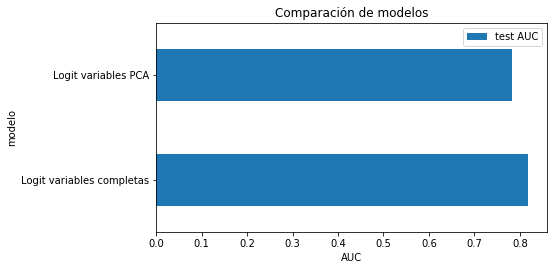

In [100]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Logit variables completas', 'Logit variables PCA'],
                    'test AUC': [lr_auc2,  lr_auc]
                 })


fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('AUC')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

## Se escoge el modelo con mejor desempeño: Modelo logit con todas las variables en su estimación

### Significancias de las variables del modelo con el mejor desempeño:  Logit 2 (Modelo con todas las variables )

In [101]:
def logit_pvalue(model, x):

    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

indice =[i for i in X2_test.columns]
indice.insert(0,"Intercept")


pvalue=pd.DataFrame(
    data = logit_pvalue(lr2, X2_train).T,
    columns  =  ["P-value"],
    index = indice
)

pvalue

,P-value
Intercept,6.230104e-06
ESTU_INSE_INDIVIDUAL,2.725855e-10
indice_total_colegio,3.813879e-05
ESTU_GENERO_M,0.000000e+00
ESTU_TIENEETNIA_Si,0.000000e+00
...,...
regiones_CARIBLE,0.000000e+00
regiones_EXTRANJERO,9.559184e-01
regiones_INSULAR,4.770448e-01
regiones_ORINOQUIA,6.063070e-01


### Variables no significativas para el modelo con mejor desempeño: Logit 2 (Modelo con todas las variables).

In [102]:
pvalue[( pvalue["P-value"] > 0.05)]

,P-value
FAMI_EDUCACIONPADRE_No Aplica,0.335499
FAMI_EDUCACIONMADRE_No Aplica,0.125155
FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,0.702892
"FAMI_TRABAJOLABORPADRE_Es operario de máquinas o conduce vehículos (taxita, chofer)",0.937443
FAMI_TRABAJOLABORPADRE_No aplica,0.372408
FAMI_TRABAJOLABORPADRE_No sabe,0.087607
FAMI_TRABAJOLABORPADRE_Pensionado,0.096540
FAMI_TRABAJOLABORMADRE_Es vendedor o trabaja en atención al público,0.085964
"FAMI_TRABAJOLABORMADRE_Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)",0.671064
regiones_ANDINA,0.150570


### Importancia de las variables del modelo seleccionado 

<BarContainer object of 94 artists>

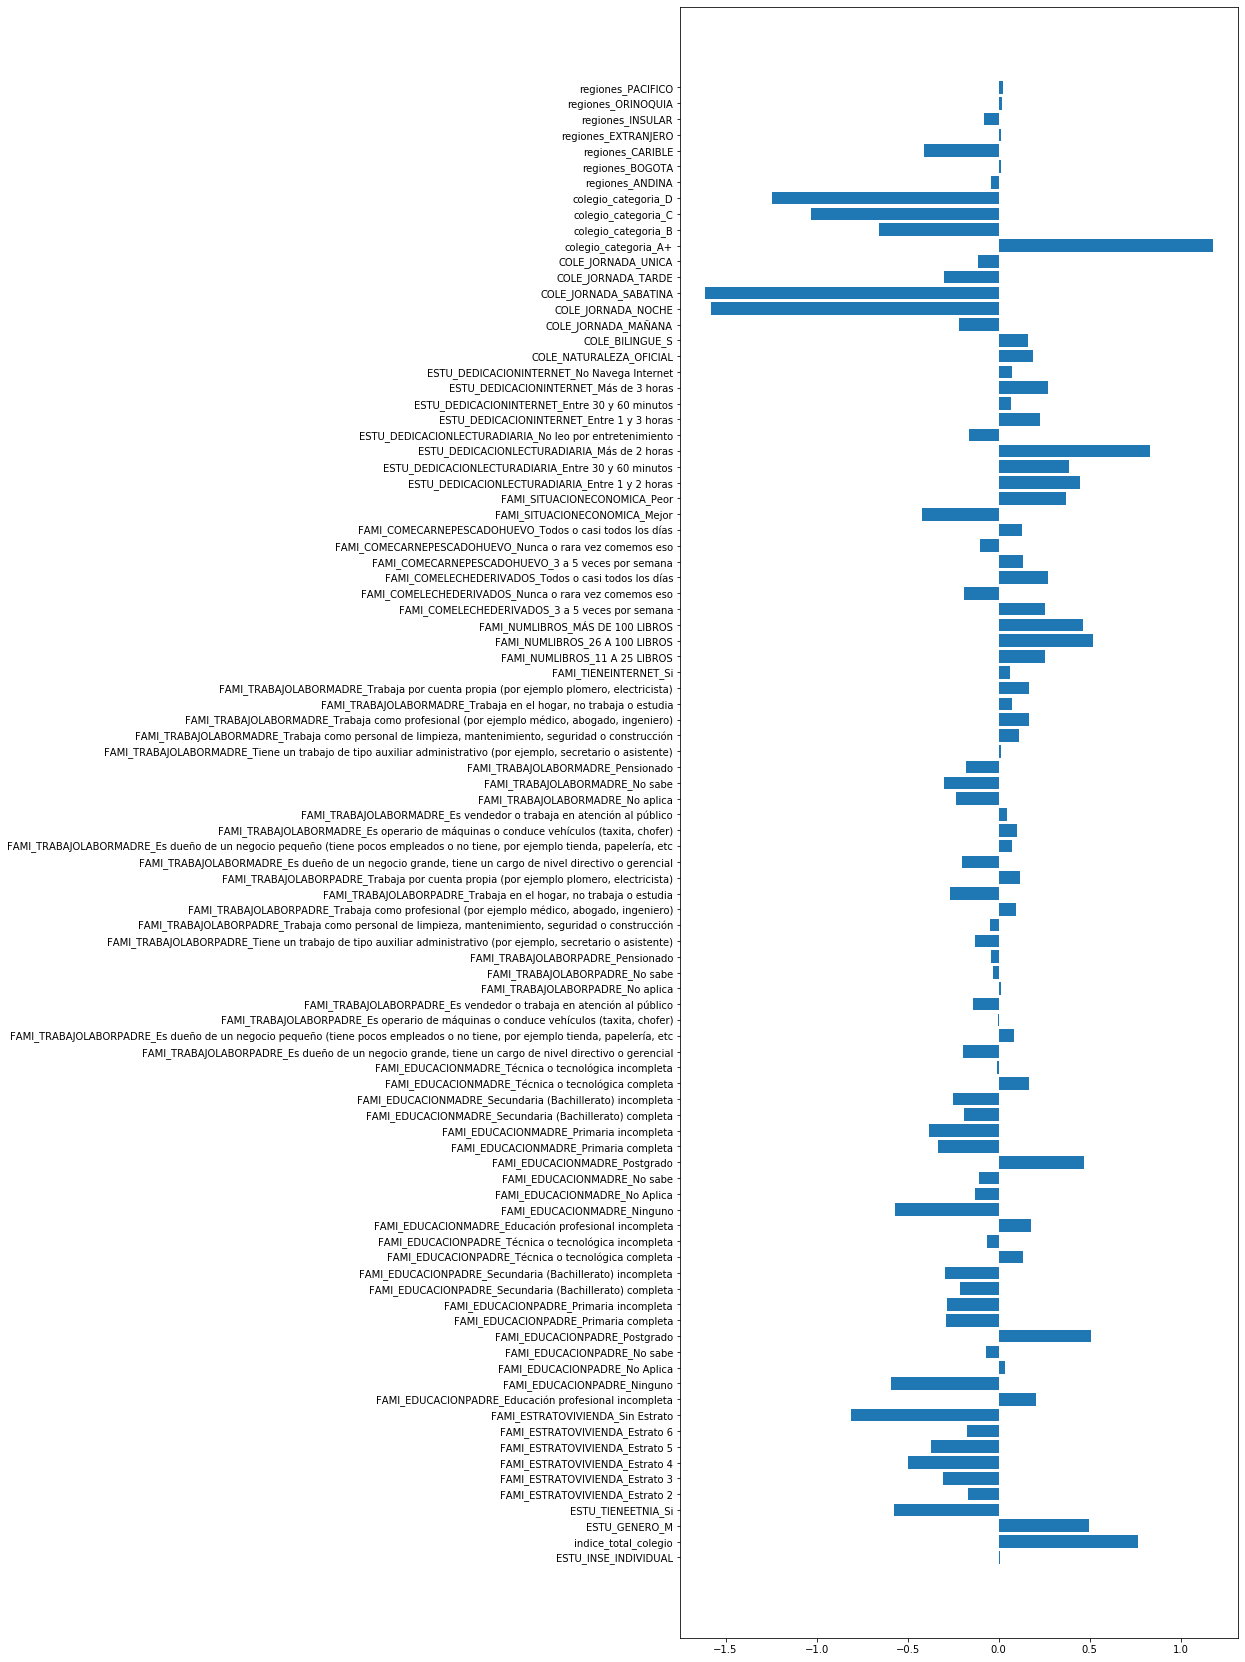

In [103]:
importance = lr2.coef_[0]
x = 10
y = 30
plt.figure(figsize = (x,y))
pyplot.barh(X2_test.columns, importance)  

### Top 5 variables más relevantes para el modelo esocogido: Logit 2 

<BarContainer object of 5 artists>

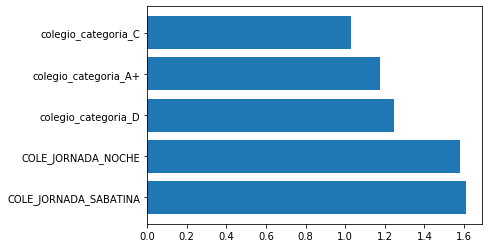

In [104]:
mas_relevantes=pd.DataFrame({ 
                'variable' : [i for i in X2_test.columns],
                 "peso" : abs(importance)
                
            })
    
mas_relevantes=mas_relevantes.sort_values('peso', ascending= False ).iloc[:5,]
pyplot.barh(mas_relevantes["variable"], mas_relevantes["peso"])  

### Predicción probabilidades 

In [105]:
y2_test["predicciones"] = y2_pred 
y2_test["predicciones_probabilidades"] = lr_probs2 
y2_test.head()

,y,predicciones,predicciones_probabilidades
ESTU_CONSECUTIVO,,,
SB11201940548225,1,1,0.511190
SB11201940152719,0,0,0.308347
SB11201940031570,1,1,0.963056
SB11201940097961,0,1,0.578595
SB11201940138681,1,1,0.679328


## Conclusiones 

Dado los resultados del desempeño de los dos modelos logit (AUC), el modelo con mejor desempeño es el que tiene todas las variables (94). Sin embargo, no solo se tomó en cuenta el AUC para le decisión final, también la interpretabilidad de las variables. Dado que con un modelo PCA para reducir el espacio vectorial, que genera diferentes combinaciones lineales, la interpretabilidad se pierde en cierta medida, por eso, otra de las características a tener en cuenta al escoger el modelo a implementar fue la interpretabilidad de las variables.

Para el caso del modelo con el mejor desempeño, los resultados del AUC permiten interpretar que las predicciones tienen una probabilidad del 81% del que modelo distinga entre positivos y negativos. Asimismo, el modelo presenta un 74% de estudiantes clasificados correctamente, así como un 73% de estudiantes identificados correctamente como positivos. 

Por otra parte, el modelo escogido, la mayoría de las 94 variables son significativas para el modelo, no obstante, las variables que tienen mayor peso en la predicción son las relacionadas con la jornada del colegio y la categoría de este donde estudian los participantes de las pruebas saber 11.

El modelo al ser de clasificación no necesita el supuesto de normalidad, por lo cual es un supuesto que no se tiene en cuenta. Sin embargo, no se evaluó lo multicolinealidad dado que en las relaciones entre las variables numéricas no se evidencio ninguna relación lineal fuerte entre estas, y en el caso de las dummys, no es necesario. 

Al estimar la deviance, se puede concluir que el modelo propuesto puede ser explicado por los parámetros más la intersección. 

Las predicciones permiten anticiparse a los resultados del potencial de estudiantes a participar en las pruebas saber 11 al tener las variables demográficas y de las características del colegio al que pertencen (presentes en la estimación del modelo con mejor desempeño), clasificando el probable desempeño de los estudiantes entre bueno o malo según corresponda. 






# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

# Análisis interactivo

La herramienta a continuación permite generar un análisis preciso de las características principales que pueden explicar el desempeño de los estudiantes que presentan las pruebas saber 11, así como poder observar los cambios en las distribuciones como según el desempeño obtenido de los estudiantes en la prueba. 

Asimismo, la herramienta permite observar los cambios en las distribuciones de los puntajes obtenidos por los estudiantes en las pruebas saber 11 en la variable que se escoja en el tablero interactivo para cada nivel de esta. 

También la herramienta cuenta con una selección del puntaje para ver cambios en las distribuciones de los estudiantes que participaron en las pruebas saber 11 del año 2019 según sea la variable escogida. 

Por otra parte, la herramienta permite filtrar no solo las variables, el puntaje sino tener vista global de todos los estudiantes donde se podrán observar las distribuciones correspondientes al puntaje global obtenido, al índice socioeconómico de los participantes y el índice del colegio del estudiante que participa en la prueba.

Es importante conocer las características que generan cambios en las distribuciones para entender el rendimiento en las pruebas y como se relaciona la desigualdad con el desempeño de los estudiantes en las pruebas. 

Al existir un considerable volumen de datos, es posible que los filtros tomen unos segundos.

A continuación la herramienta:




## Base Demo 

Esta base es una muestra aleatoria de la base final. La base corresponde al 5% del total de filas de la base final. 
La base se usará en la visualización interactiva. 
- La base se encontrará disponible en el repositorio correspondiente a la entrega del laboratorio (data_demo_saber11.csv)

In [106]:
#df_demo = df_imput.sample(n=int(df_imput.shape[0]*0.05), random_state=123)
#df_demo.shape

In [107]:
#df_demo.to_csv("data_demo_saber11.csv")

In [108]:
df_demo_saber11=pd.read_csv('data_demo_saber11.csv')
print(f'dimesión del conjunto de datos en filas y columnas {df_demo_saber11.shape}')

dimesión del conjunto de datos en filas y columnas (28364, 27)


In [109]:
Variables=[i for i in df_demo_saber11.drop([ 'ESTU_CONSECUTIVO','ESTU_MCPIO_RESIDE', 'PUNT_GLOBAL', 'PERCENTIL_GLOBAL','ESTU_INSE_INDIVIDUAL','indice_total_colegio'], axis = 1, inplace = False).columns]
Variables.insert(0,"Todos")

def copiar_df (df):
    return df.copy()

df_herrmianta = copiar_df(df_demo_saber11)

def filtrar(Variables, Puntaje):
    df = df_herrmianta
    if Variables != "Todos": 
        display(df[(df["PUNT_GLOBAL"] <= Puntaje)][Variables].groupby(df[Variables]).count().plot(kind="barh", figsize = (6,6)))
        plt.title(str(Variables) + "- Puntaje globale")
        plt.show()
        plt.figure(figsize = (6,6))
        display(sns.boxplot( y = Variables   , x = "PUNT_GLOBAL" , data=df , order = sorted(df[Variables].unique().tolist()) ));
        plt.show()    
    else:
        plt.figure(figsize = (4,3))
        display(sns.distplot(df["PUNT_GLOBAL"]))
        plt.title("Puntaje global")
        plt.xlabel('Puntaje')
        plt.ylabel('Densidad')
        plt.show();
        fig1 = plt.figure()
        fig1.subplots_adjust(hspace=0.5, wspace=0.5)
        ax = fig1.add_subplot(1, 2, 1)
        display(sns.distplot(df[(df["PUNT_GLOBAL"] <= Puntaje)]["ESTU_INSE_INDIVIDUAL"]))
        plt.title("Puntaje global")
        plt.xlabel('Nivel Socioeconómico del evaluado')
        plt.ylabel('Densidad')
        ax = fig1.add_subplot(1, 2, 2)
        display(sns.distplot(df[(df["PUNT_GLOBAL"] <= Puntaje)]["indice_total_colegio"]))
        plt.title("Indice colegio")
        plt.xlabel('Indice')
        plt.ylabel('Densidad')
        plt.show();
interactive_plot = interactive(
                                filtrar, 
                                Variables = Variables,
                                Puntaje = (df_imput["PUNT_GLOBAL"].min(), df_imput["PUNT_GLOBAL"].max(), 50) 
                                
                              )
display(interactive_plot)


interactive(children=(Dropdown(description='Variables', options=('Todos', 'ESTU_GENERO', 'ESTU_TIENEETNIA', 'E…